In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

import sys
sys.path.append('Config')
from lablib import *

In [120]:
def prop_err_mol(a, b, sa, sb):
    return np.sqrt(sa**2 * b**2 + sb**2 * a**2) 
def exp(x, a, b):
    return a * np.exp(-b * x) 

In [121]:
def ang_sol_exp(x, a, b, c):
    return a / (b + x)**2 * np.exp(-c*x)

# PLASTICA

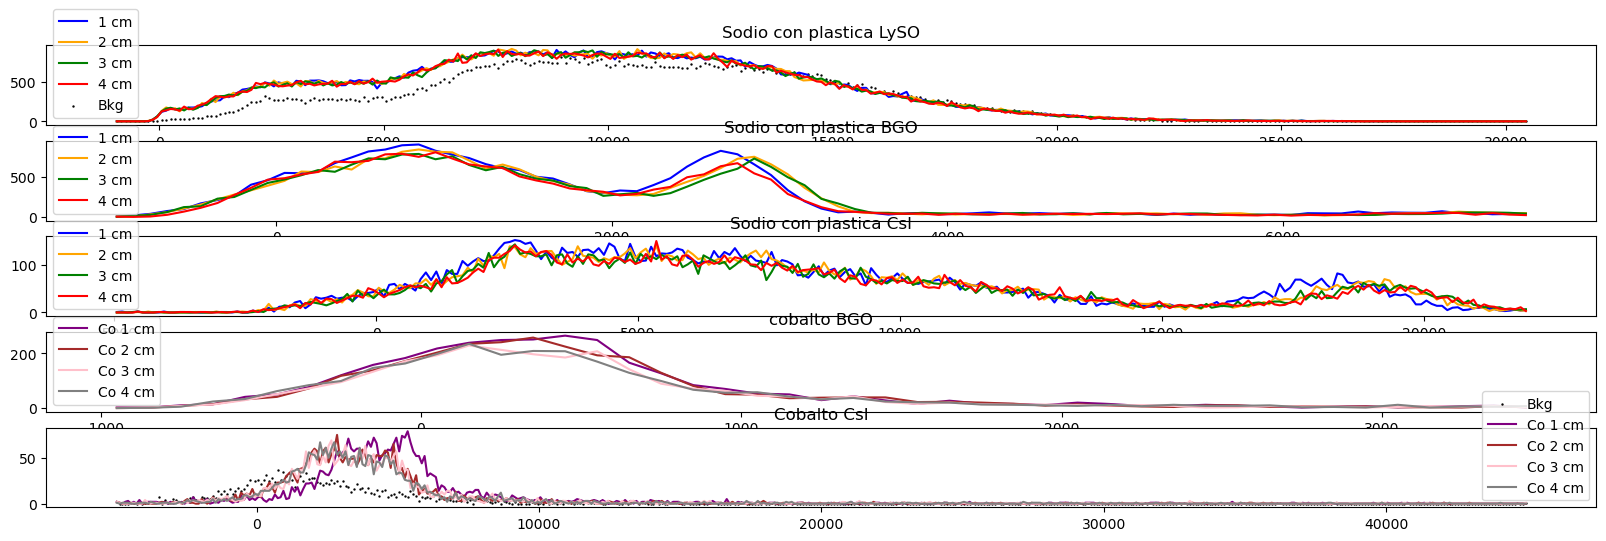

In [122]:
#spiego nome: sodio_lyso_1cm_plastica
# #prendo dati di LySO e fondo lyso
Na_L_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_1.txt', titles = ['ADC', 'Counts'])
Na_L_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_2.txt', titles = ['ADC', 'Counts'])
Na_L_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_3.txt', titles = ['ADC', 'Counts'])
Na_L_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_4.txt', titles = ['ADC', 'Counts'])
bkg_L  = read_corretto(path = 'Dati/Parte 2/LySO/Bkg_55.5V.txt', titles = ['ADC', 'Counts'])
#prendo dati BGO
Na_B_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_1.txt', titles = ['ADC', 'Counts'])
Na_B_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_2.txt', titles = ['ADC', 'Counts'])
Na_B_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_3.txt', titles = ['ADC', 'Counts'])
Na_B_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_4.txt', titles = ['ADC', 'Counts'])
#prendo dati con CsI
Na_C_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_csi_1.txt', titles = ['ADC', 'Counts'])
Na_C_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_csi_2.txt', titles = ['ADC', 'Counts'])
Na_C_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_csi_3.txt', titles = ['ADC', 'Counts'])
Na_C_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_csi_4.txt', titles = ['ADC', 'Counts'])
#prendo dati BGO con cobalto
#BGO
Co_B_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_bgo_1.txt', titles = ['ADC', 'Counts'])
Co_B_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_bgo_2.txt', titles = ['ADC', 'Counts'])
Co_B_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_bgo_3.txt', titles = ['ADC', 'Counts'])
Co_B_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_bgo_4.txt', titles = ['ADC', 'Counts'])
#CsI
Co_C_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_csi_1.txt', titles = ['ADC', 'Counts'])
Co_C_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_csi_2.txt', titles = ['ADC', 'Counts'])
Co_C_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_csi_3.txt', titles = ['ADC', 'Counts'])
Co_C_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_csi_4.txt', titles = ['ADC', 'Counts'])
#fondo CsI
bkg_C  = read_corretto(path = 'Dati/Parte 2/CsI/Bkg_54.5V.txt', titles = ['ADC', 'Counts'])
#farò dei plot, non plotto tutti gli zeri finali però
Fig, axes = plt.subplots(5, 1, figsize = (20, 6))
start_index = 0
end_index_L = 380 - 65
end_index_B = 150 - 65
end_index_C = 335 - 65
axes[0].plot(Na_L_1_p['ADC'][start_index:end_index_L], Na_L_1_p['Counts'][start_index:end_index_L], label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_p['ADC'][start_index:end_index_L], Na_L_2_p['Counts'][start_index:end_index_L], label = '2 cm', color = 'orange')  
axes[0].plot(Na_L_3_p['ADC'][start_index:end_index_L], Na_L_3_p['Counts'][start_index:end_index_L], label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_p['ADC'][start_index:end_index_L], Na_L_4_p['Counts'][start_index:end_index_L], label = '4 cm', color = 'red')
axes[0].scatter(bkg_L['ADC'][start_index:end_index_L], bkg_L['Counts'][start_index:end_index_L], label = 'Bkg', color = 'black', s = 0.5)
axes[0].legend()
axes[0].set_title('Sodio con plastica LySO')
axes[1].plot(Na_B_1_p['ADC'][start_index:end_index_B], Na_B_1_p['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_p['ADC'][start_index:end_index_B], Na_B_2_p['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_p['ADC'][start_index:end_index_B], Na_B_3_p['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].plot(Na_B_4_p['ADC'][start_index:end_index_B], Na_B_4_p['Counts'][start_index:end_index_B], label = '4 cm', color = 'red')
axes[1].legend()
axes[1].set_title('Sodio con plastica BGO')
axes[2].set_title('Sodio con plastica CsI')
axes[2].plot(Na_C_1_p['ADC'][start_index:end_index_C], Na_C_1_p['Counts'][start_index:end_index_C], label = '1 cm', color = 'blue')
axes[2].plot(Na_C_2_p['ADC'][start_index:end_index_C], Na_C_2_p['Counts'][start_index:end_index_C], label = '2 cm', color = 'orange')
axes[2].plot(Na_C_3_p['ADC'][start_index:end_index_C], Na_C_3_p['Counts'][start_index:end_index_C], label = '3 cm', color = 'green')
axes[2].plot(Na_C_4_p['ADC'][start_index:end_index_C], Na_C_4_p['Counts'][start_index:end_index_C], label = '4 cm', color = 'red')
axes[2].legend()
#Cobalto 
end_index_B = 110 - 65
axes[3].plot(Co_B_1_p['ADC'][start_index:end_index_B], Co_B_1_p['Counts'][start_index:end_index_B], label = 'Co 1 cm', color = 'purple')
axes[3].plot(Co_B_2_p['ADC'][start_index:end_index_B], Co_B_2_p['Counts'][start_index:end_index_B], label = 'Co 2 cm', color = 'brown')
axes[3].plot(Co_B_3_p['ADC'][start_index:end_index_B], Co_B_3_p['Counts'][start_index:end_index_B], label = 'Co 3 cm', color = 'pink')
axes[3].plot(Co_B_4_p['ADC'][start_index:end_index_B], Co_B_4_p['Counts'][start_index:end_index_B], label = 'Co 4 cm', color = 'gray')
axes[3].set_title('cobalto BGO')
axes[3].legend()
axes[4].set_title('Cobalto CsI')
start_index_C = 0
end_index_C = 600 - 65
axes[4].scatter(bkg_C['ADC'][start_index:end_index_C], bkg_C['Counts'][start_index:end_index_C], label = 'Bkg', color = 'black', s = 0.5)
axes[4].plot(Co_C_1_p['ADC'][start_index_C:end_index_C], Co_C_1_p['Counts'][start_index_C:end_index_C], label = 'Co 1 cm', color = 'purple')
axes[4].plot(Co_C_2_p['ADC'][start_index_C:end_index_C], Co_C_2_p['Counts'][start_index_C:end_index_C], label = 'Co 2 cm', color = 'brown')
axes[4].plot(Co_C_3_p['ADC'][start_index_C:end_index_C], Co_C_3_p['Counts'][start_index_C:end_index_C], label = 'Co 3 cm', color = 'pink')
axes[4].plot(Co_C_4_p['ADC'][start_index_C:end_index_C], Co_C_4_p['Counts'][start_index_C:end_index_C], label = 'Co 4 cm', color = 'gray')
axes[4].legend()

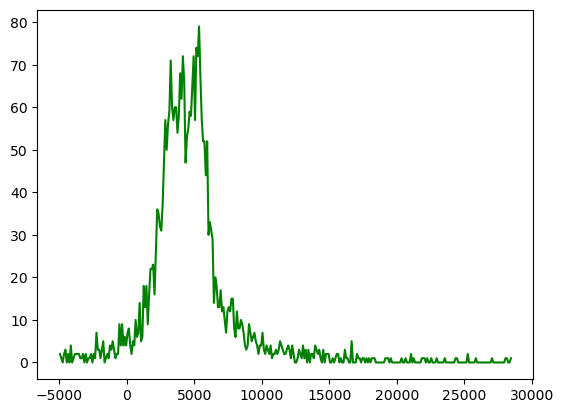

In [123]:
start_index_C = 0
end_index_C = 400 - 65
plt.plot(Co_C_1_p['ADC'][start_index_C:end_index_C], Co_C_1_p['Counts'][start_index_C:end_index_C], label = 'Co 1 cm', color = 'green')
# plt.plot (Co_C_1_p['ADC'][start_index_C:end_index_C], Co_C_1_p['Counts'][start_index_C:end_index_C]-bkg_C['Counts'][start_index_C:end_index_C], label = 'Co 1 cm', color = 'purple')

## LySO

Text(0.5, 1.0, 'Sodio con plastica BGO')

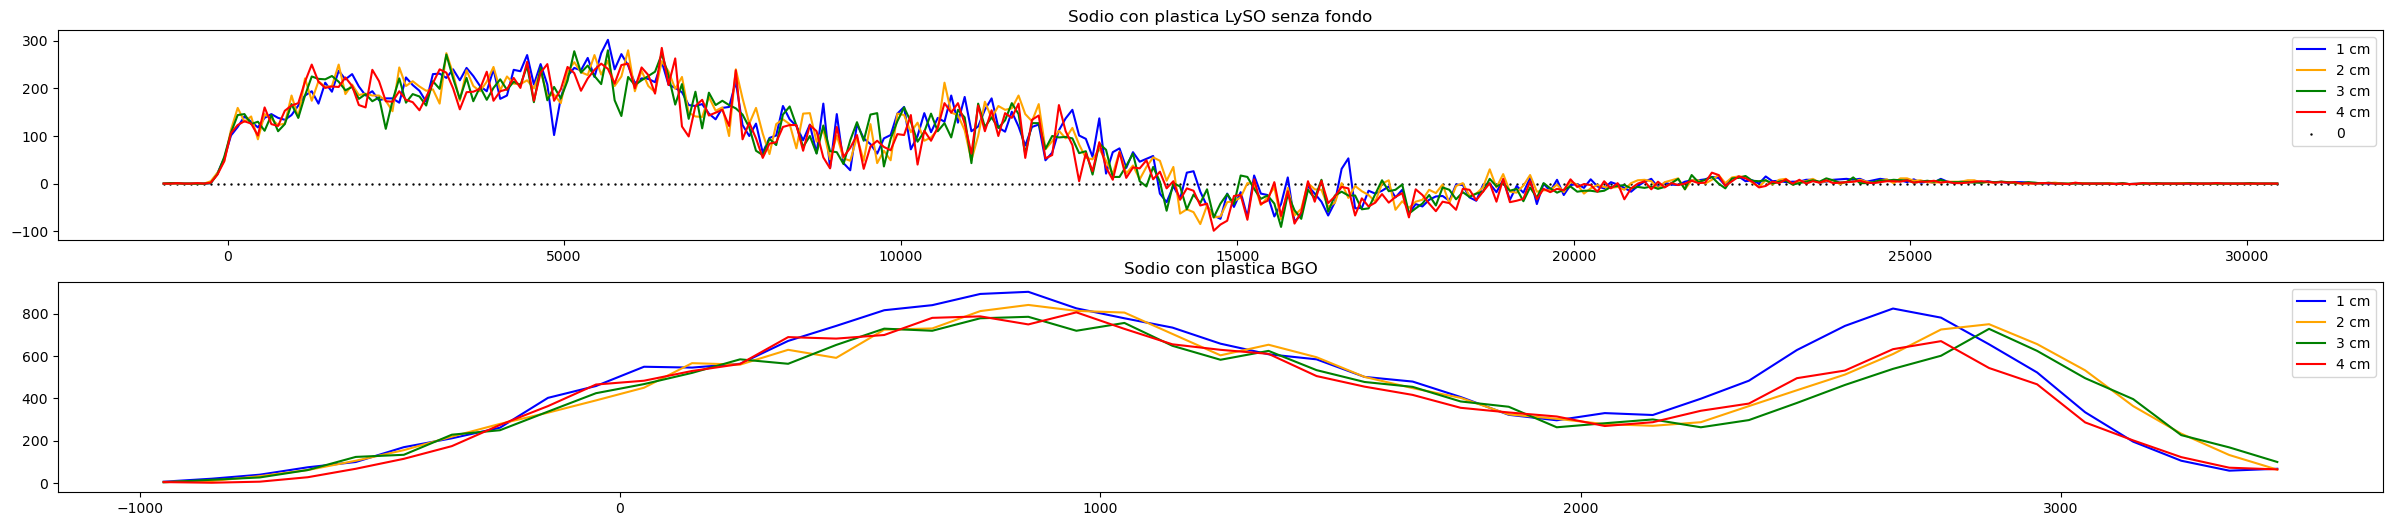

In [124]:
#non si vede una mazza con LySO, probabilmente è colpa del fondo, ora provo a toglierlo. e riplotto.
Na_L_1_nobkg_p = Na_L_1_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_2_nobkg_p = Na_L_2_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_3_nobkg_p = Na_L_3_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_4_nobkg_p = Na_L_4_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
a = np.zeros(len(Na_L_1_nobkg_p))
Fig, axes = plt.subplots(2, 1, figsize = (30, 6))
axes[0].plot(Na_L_1_p['ADC'][start_index:end_index_L], Na_L_1_nobkg_p, label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_p['ADC'][start_index:end_index_L], Na_L_2_nobkg_p, label = '2 cm', color = 'orange')  
axes[0].plot(Na_L_3_p['ADC'][start_index:end_index_L], Na_L_3_nobkg_p, label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_p['ADC'][start_index:end_index_L], Na_L_4_nobkg_p, label = '4 cm', color = 'red')
axes[0].scatter(bkg_L['ADC'][start_index:end_index_L], a, label = '0', color = 'black', s = 0.5)
axes[0].legend()
axes[0].set_title('Sodio con plastica LySO senza fondo')
axes[1].plot(Na_B_1_p['ADC'][start_index:end_index_B], Na_B_1_p['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_p['ADC'][start_index:end_index_B], Na_B_2_p['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_p['ADC'][start_index:end_index_B], Na_B_3_p['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].plot(Na_B_4_p['ADC'][start_index:end_index_B], Na_B_4_p['Counts'][start_index:end_index_B], label = '4 cm', color = 'red')
axes[1].legend()
axes[1].set_title('Sodio con plastica BGO')

#non si capisce comunque una mazza col LySO

## BGO

### Na

In [125]:
#1cm
start_index = 92 - 65
end_index_B = 115 - 65
pars, vals, errs, *others = LS_fit(Na_B_1_p['ADC'][start_index:end_index_B], Na_B_1_p['Counts'][start_index:end_index_B], 
                                   np.array(np.sqrt(Na_B_1_p['Counts'][start_index:end_index_B])), gauss_pol2, mu = 3000, sigma = 400, S = 400, a = 0, b = 0, c = 0)

s1 = vals[1]
mu1 = vals[0]
sig1 = vals[2]
err_s1 = errs[1]
err_sig1 = errs[2]
#2cm
start_index = 95 - 65
end_index_B = 115 - 65
pars, vals, errs, *others = LS_fit(Na_B_2_p['ADC'][start_index:end_index_B], Na_B_2_p['Counts'][start_index:end_index_B], 
                                   np.array(np.sqrt(Na_B_2_p['Counts'][start_index:end_index_B])), gauss_pol2, mu = 3000, sigma = 300, S = 700, a = 0, b = 0, c = 0 )
s2 = vals[1]
mu2 = vals[0]
sig2 = vals[2]
err_s2 = errs[1]
err_sig2 = errs[2]
#3cm
start_index = 97 - 65
end_index_B = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_3_p['ADC'][start_index:end_index_B], Na_B_3_p['Counts'][start_index:end_index_B],
                                   np.array(np.sqrt(Na_B_3_p['Counts'][start_index:end_index_B])), gauss_pol2, mu = 3000, sigma = 300, S = 800, a = 0, b = 0, c = 0)
s3 = vals[1]
mu3 = vals[0]
sig3 = vals[2]
err_s3 = errs[1]
err_sig3 = errs[2]
#4 cm
start_index = 90 - 65
end_index_B = 127 - 65
pars, vals, errs, *others = LS_fit(Na_B_4_p['ADC'][start_index:end_index_B], Na_B_4_p['Counts'][start_index:end_index_B], 
                                   np.array(np.sqrt(Na_B_4_p['Counts'][start_index:end_index_B])), gauss_pol2, mu = 3000, sigma = 300, S = 800, a = 0, b = 0, c = 0)
mu4 = vals[0]
s4 = vals[1]
sig4 = vals[2]
err_s4 = errs[1]
err_sig4 = errs[2]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 27.15 (χ²/ndof = 1.6)      │              Nfcn = 414              │
│ EDM = 1.9e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.687e3  │  0.006e3  │            │            │         │         │       │
│ 1 │ sigma │    253    │     6     │            │            │         │         │       │
│ 2 │ S     │    693    │    16     │            │            │         │         │       │
│ 3 │ a     │  1.24e3   │  0.07e3   │            │            │         │         │       │
│ 4 │ b     │   -0.65   │   0.05    │            │            │         │         │       │
│ 5 │ c     │   87e-6   │   9e-6    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         33.3           -7            4          123      -0.0764  11.49760e-6 │
│ sigma │           -7         38.1          -20          130      -0.1264  24.53924e-6 │
│     S │            4          -20          249       0.22e3      -0.1994  37.54702e-6 │
│     a │          123          130       0.22e3     4.78e+03      -3.4769 587.43847e-6 │
│     b │      -0.0764      -0.1264      -0.1994      -3.4769      0.00262   -450.65e-9 │
│     c │  11.49760e-6  24.53924e-6  37.54702e-6 587.43847e-6   -450.65e-9     7.85e-11 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 18.36 (χ²/ndof = 1.3)      │              Nfcn = 405              │
│ EDM = 5.2e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.823e3  │  0.007e3  │            │            │         │         │       │
│ 1 │ sigma │    269    │     8     │            │            │         │         │       │
│ 2 │ S     │    644    │    16     │            │            │         │         │       │
│ 3 │ a     │  1.34e3   │  0.12e3   │            │            │         │         │       │
│ 4 │ b     │   -0.72   │   0.09    │            │            │         │         │       │
│ 5 │ c     │ 0.100e-3  │ 0.015e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────┐
│       │            mu         sigma             S             a             b             c │
├───────┼─────────────────────────────────────────────────────────────────────────────────────┤
│    mu │          45.8           -20             0           300        -0.175   25.00621e-6 │
│ sigma │           -20          68.9            20           390        -0.356   66.32647e-6 │
│     S │             0            20           270        0.79e3        -0.649  115.94643e-6 │
│     a │           300           390        0.79e3       1.5e+04       -10.701 1.77264709e-3 │
│     b │        -0.175        -0.356        -0.649       -10.701        0.0078   -1.30978e-6 │
│     c │   25.00621e-6   66.32647e-6  115.94643e-6 1.77264709e-3   -1.30978e-6      2.22e-10 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 25.77 (χ²/ndof = 1.7)      │              Nfcn = 379              │
│ EDM = 2.88e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.853e3  │  0.009e3  │            │            │         │         │       │
│ 1 │ sigma │    259    │     9     │            │            │         │         │       │
│ 2 │ S     │    549    │    15     │            │            │         │         │       │
│ 3 │ a     │  1.02e3   │  0.12e3   │            │            │         │         │       │
│ 4 │ b     │   -0.48   │   0.06    │            │            │         │         │       │
│ 5 │ c     │   59e-6   │   9e-6    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         79.7          -40          -30          700       -0.359  45.66954e-6 │
│ sigma │          -40         83.6           10         -490        0.200 -19.39373e-6 │
│     S │          -30           10          232      -0.46e3        0.185 -17.35181e-6 │
│     a │          700         -490      -0.46e3     1.32e+04       -7.105 950.90110e-6 │
│     b │       -0.359        0.200        0.185       -7.105      0.00395   -542.80e-9 │
│     c │  45.66954e-6 -19.39373e-6 -17.35181e-6 950.90110e-6   -542.80e-9     7.62e-11 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 53.03 (χ²/ndof = 1.7)      │              Nfcn = 573              │
│ EDM = 3.51e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.718e3  │  0.007e3  │            │            │         │         │       │
│ 1 │ sigma │    237    │     6     │            │            │         │         │       │
│ 2 │ S     │    496    │    14     │            │            │         │         │       │
│ 3 │ a     │    961    │    24     │            │            │         │         │       │
│ 4 │ b     │  -0.429   │   0.013   │            │            │         │         │       │
│ 5 │ c     │  49.2e-6  │  1.7e-6   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────┐
│       │            mu         sigma             S             a             b             c │
├───────┼─────────────────────────────────────────────────────────────────────────────────────┤
│    mu │          47.9           -10             0            40     -21.01e-3  2.5321366e-6 │
│ sigma │           -10          38.8           -40           -30      11.36e-3  -808.5584e-9 │
│     S │             0           -40           195       -0.03e3       9.57e-3  -727.3085e-9 │
│     a │            40           -30       -0.03e3           586    -301.78e-3 37.7752985e-6 │
│     b │     -21.01e-3      11.36e-3       9.57e-3    -301.78e-3      0.000164   -21.2832e-9 │
│     c │  2.5321366e-6  -808.5584e-9  -727.3085e-9 37.7752985e-6   -21.2832e-9      2.85e-12 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────┘

In [126]:
pars, vals, errs, *others = LS_fit([1,2,3,4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
                                            [prop_err_mol(s1, sig1, err_s1, err_sig1),
                                             prop_err_mol(s2, sig2, err_s2, err_sig2),
                                             prop_err_mol(s3, sig3, err_s3, err_sig3),
                                             prop_err_mol(s4, sig4, err_s4, err_sig4) ],
                                             exp, a = 1, b = 0.1)
att_B_p_N = vals[1]
err_att_B_p_N = errs[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.426 (χ²/ndof = 3.2)      │              Nfcn = 432              │
│ EDM = 3.53e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   208e3   │    9e3    │            │            │         │         │       │
│ 1 │ b    │   0.135   │   0.016   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │  7.47e+07 119.51584 │
│ b │ 119.51584  0.000244 │
└───┴─────────────────────┘

In [127]:
for i in range(len(vals)):
    if i <= 1:
        print(f"$ \\{pars[i]} $ & {vals[i]:.1E} & {errs[i]:.1E} \\\\ \\hline")
    else:
        print(f"{pars[i]} & {vals[i]:.1E} & {errs[i]:.1E} \\\\ \\hline")

$ \a $ & 2.1E+05 & 8.6E+03 \\ \hline
$ \b $ & 1.4E-01 & 1.6E-02 \\ \hline


### Co

In [128]:
# 1cm
start_index_B = 0
end_index_B = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_1_p['ADC'][start_index_B:end_index_B], Co_B_1_p['Counts'][start_index_B:end_index_B],
                                   np.array(np.sqrt(Co_B_1_p['Counts'][start_index_B:end_index_B])), 
                                   gauss_pol1, mu = 100, sigma = 300, S = 400, a = 0, b = 0)

s1 = vals[2]
sig1 = vals[1]
err_s1 = errs[2]
err_sig1 = errs[1]

#2 cm
start_index_B = 4
end_index_B = 90 - 65
pars, vals, errs, *others = LS_fit(Co_B_2_p['ADC'][start_index_B:end_index_B], Co_B_2_p['Counts'][start_index_B:end_index_B],
                                   np.array(np.sqrt(Co_B_2_p['Counts'][start_index_B:end_index_B])), 
                                   gauss_pol1, mu = 280, sigma = 250, S = 250, a = 10, b = 0)

s2 = vals[2]
sig2 = vals[1]
err_s2 = errs[2]
err_sig2 = errs[1]

#3 cm
start_index_B = 0
end_index_B = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_3_p['ADC'][start_index_B:end_index_B], Co_B_3_p['Counts'][start_index_B:end_index_B],
                                   np.array(np.sqrt(Co_B_3_p['Counts'][start_index_B:end_index_B])), 
                                   gauss_pol1, mu = 280, sigma = 250, S = 200, a = 10, b = 0)
s3 = vals[2]
sig3 = vals[1]
err_s3 = errs[2]
err_sig3 = errs[1]

# 4cm
start_index_B = 4
end_index_B = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_4_p['ADC'][start_index_B:end_index_B], Co_B_4_p['Counts'][start_index_B:end_index_B],
                                   np.array(np.sqrt(Co_B_4_p['Counts'][start_index_B:end_index_B])), 
                                   gauss_pol1, mu = 280, sigma = 250, S = 200, a = 10, b = 0)
s4 = vals[2]
sig4 = vals[1]
err_s4 = errs[2]
err_sig4 = errs[1]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 74.94 (χ²/ndof = 2.5)      │              Nfcn = 176              │
│ EDM = 7.13e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    285    │     9     │            │            │         │         │       │
│ 1 │ sigma │    411    │     9     │            │            │         │         │       │
│ 2 │ S     │    254    │     6     │            │            │         │         │       │
│ 3 │ a     │    3.0    │    1.2    │            │            │         │         │       │
│ 4 │ b     │  5.0e-3   │  0.6e-3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────────────────────────────────┐
│       │         mu      sigma          S          a          b │
├───────┼────────────────────────────────────────────────────────┤
│    mu │       82.5          0         -0        2.2 -1.7530e-3 │
│ sigma │          0       86.7        -30       -7.7  2.5224e-3 │
│     S │         -0        -30       42.1        1.3  -575.9e-6 │
│     a │        2.2       -7.7        1.3       1.41  -425.7e-6 │
│     b │ -1.7530e-3  2.5224e-3  -575.9e-6  -425.7e-6    3.8e-07 │
└───────┴────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 18.16 (χ²/ndof = 1.1)      │              Nfcn = 173              │
│ EDM = 2.25e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    263    │    14     │            │            │         │         │       │
│ 1 │ sigma │    357    │    15     │            │            │         │         │       │
│ 2 │ S     │    233    │     8     │            │            │         │         │       │
│ 3 │ a     │    19     │     6     │            │            │         │         │       │
│ 4 │ b     │   0.010   │   0.004   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────────────────────────────────┐
│       │         mu      sigma          S          a          b │
├───────┼────────────────────────────────────────────────────────┤
│    mu │        191    -0.10e3        -20         50 -43.793e-3 │
│ sigma │    -0.10e3        234         10        -80  42.303e-3 │
│     S │        -20         10       57.8        -20  11.514e-3 │
│     a │         50        -80        -20         42 -23.875e-3 │
│     b │ -43.793e-3  42.303e-3  11.514e-3 -23.875e-3   1.94e-05 │
└───────┴────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 109.1 (χ²/ndof = 3.6)      │              Nfcn = 184              │
│ EDM = 5.47e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    278    │    10     │            │            │         │         │       │
│ 1 │ sigma │    423    │    11     │            │            │         │         │       │
│ 2 │ S     │    211    │     6     │            │            │         │         │       │
│ 3 │ a     │    1.0    │    1.1    │            │            │         │         │       │
│ 4 │ b     │  3.3e-3   │  0.5e-3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────┐
│       │          mu       sigma           S           a           b │
├───────┼─────────────────────────────────────────────────────────────┤
│    mu │         103      0.02e3         -10         1.3 -1.21996e-3 │
│ sigma │      0.02e3         119         -40        -8.5  2.89284e-3 │
│     S │         -10         -40        35.5         1.3  -515.52e-6 │
│     a │         1.3        -8.5         1.3        1.19  -384.24e-6 │
│     b │ -1.21996e-3  2.89284e-3  -515.52e-6  -384.24e-6     2.7e-07 │
└───────┴─────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 46.16 (χ²/ndof = 1.8)      │              Nfcn = 201              │
│ EDM = 6.95e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    269    │    12     │            │            │         │         │       │
│ 1 │ sigma │    377    │    18     │            │            │         │         │       │
│ 2 │ S     │    192    │     7     │            │            │         │         │       │
│ 3 │ a     │    27     │     6     │            │            │         │         │       │
│ 4 │ b     │  -0.0075  │  0.0027   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────────────────────────────────┐
│       │         mu      sigma          S          a          b │
├───────┼────────────────────────────────────────────────────────┤
│    mu │        146    -0.05e3        -20         23 -11.618e-3 │
│ sigma │    -0.05e3        339        -10        -84  39.220e-3 │
│     S │        -20        -10       49.6        -14   6.934e-3 │
│     a │         23        -84        -14       31.3 -14.838e-3 │
│     b │ -11.618e-3  39.220e-3   6.934e-3 -14.838e-3   7.27e-06 │
└───────┴────────────────────────────────────────────────────────┘

### Confronto

In [129]:
pars, vals, errs, *others = LS_fit([1,2,3,4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
                                            [prop_err_mol(s1, sig1, err_s1, err_sig1),
                                             prop_err_mol(s2, sig2, err_s2, err_sig2),
                                             prop_err_mol(s3, sig3, err_s3, err_sig3),
                                             prop_err_mol(s4, sig4, err_s4, err_sig4) ],
                                             exp, a = 1, b = 0.1)
att_B_p_C = vals[1]
err_att_B_p_C = errs[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.178 (χ²/ndof = 4.1)      │              Nfcn = 367              │
│ EDM = 9.15e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   113e3   │    5e3    │            │            │         │         │       │
│ 1 │ b    │   0.101   │   0.020   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 2.99e+07  97.1648 │
│ b │  97.1648 0.000396 │
└───┴───────────────────┘

In [130]:
for i in range(len(vals)):
    if i <= 1:
        print(f"$ \\{pars[i]} $ & {vals[i]:.1E} & {errs[i]:.1E} \\\\ \\hline")
    else:
        print(f"{pars[i]} & {vals[i]:.1E} & {errs[i]:.1E} \\\\ \\hline")

$ \a $ & 1.1E+05 & 5.5E+03 \\ \hline
$ \b $ & 1.0E-01 & 2.0E-02 \\ \hline


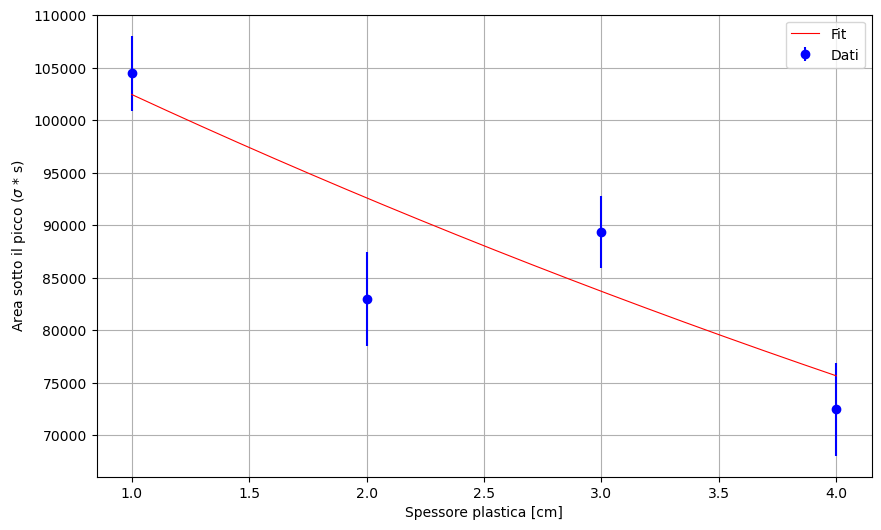

In [131]:
x = np.linspace(1, 4, 10000)
y = exp(x, vals[0], vals[1])
plt.figure(figsize = (10, 6))
plt.errorbar([1, 2, 3, 4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
             yerr = [prop_err_mol(s1, sig1, err_s1, err_sig1),
                     prop_err_mol(s2, sig2, err_s2, err_sig2),
                     prop_err_mol(s3, sig3, err_s3, err_sig3),
                     prop_err_mol(s4, sig4, err_s4, err_sig4) ],
             fmt = 'o', label = 'Dati', color = 'blue',)
plt.plot(x, y, label = 'Fit', color = 'red', linewidth = 0.8)
plt.grid()
plt.xlabel('Spessore plastica [cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.legend()

## CsI

### Na

In [132]:
# 1 cm
start_index = 250 - 65
end_index_C = 350 - 65
pars, vals, errs, *others = LS_fit(Na_C_1_p['ADC'][start_index:end_index_C], Na_C_1_p['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_1_p['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 19000, sigma = 500, S = 100, a = 0, b = 0)
mu1 = vals[0]
s1 = vals[1]
sig1 = vals[2]
err_s1 = errs[1]
err_sig1 = errs[2]

# 2 cm
start_index = 270 - 65
end_index_C = 350 - 65
pars, vals, errs, *others = LS_fit(Na_C_2_p['ADC'][start_index:end_index_C], Na_C_2_p['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_2_p['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 19000, sigma = 500, S = 100, a = 0, b = 0)
mu2 = vals[0]
s2 = vals[1]
sig2 = vals[2]
err_s2 = errs[1]
err_sig2 = errs[2]

# 3 cm
start_index = 270 - 65
end_index_C = 350 - 65
pars, vals, errs, *others = LS_fit(Na_C_3_p['ADC'][start_index:end_index_C], Na_C_3_p['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_3_p['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 19000, sigma = 500, S = 100, a = 0, b = 0)
mu3 = vals[0]
s3 = vals[1]
sig3 = vals[2]
err_s3 = errs[1]
err_sig3 = errs[2]

# 4 cm
start_index = 270 - 65
end_index_C = 350 - 65
pars, vals, errs, *others = LS_fit(Na_C_4_p['ADC'][start_index:end_index_C], Na_C_4_p['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_4_p['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 19000, sigma = 500, S = 100, a = 0, b = 0)
mu4 = vals[0]
s4 = vals[1]
sig4 = vals[2]
err_s4 = errs[1]
err_sig4 = errs[2]



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 110.5 (χ²/ndof = 1.2)      │              Nfcn = 213              │
│ EDM = 2.18e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  18.23e3  │  0.04e3   │            │            │         │         │       │
│ 1 │ sigma │    966    │    31     │            │            │         │         │       │
│ 2 │ S     │   58.3    │    2.2    │            │            │         │         │       │
│ 3 │ a     │   33.6    │    2.6    │            │            │         │         │       │
│ 4 │ b     │ -1.28e-3  │  0.12e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │      1.3e+03       -0.2e3            3           23 -1.131042e-3 │
│ sigma │       -0.2e3          940          -29          -23   886.971e-6 │
│     S │            3          -29         4.66           -1    21.147e-6 │
│     a │           23          -23           -1          6.5  -308.269e-6 │
│     b │ -1.131042e-3   886.971e-6    21.147e-6  -308.269e-6      1.5e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 72.31 (χ²/ndof = 1.0)      │              Nfcn = 215              │
│ EDM = 1.2e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  18.90e3  │  0.04e3   │            │            │         │         │       │
│ 1 │ sigma │    942    │    35     │            │            │         │         │       │
│ 2 │ S     │   54.9    │    2.1    │            │            │         │         │       │
│ 3 │ a     │    30     │     4     │            │            │         │         │       │
│ 4 │ b     │ -1.15e-3  │  0.19e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     1.45e+03       -0.5e3            4           61 -2.814776e-3 │
│ sigma │       -0.5e3     1.22e+03          -27          -66  2.739840e-3 │
│     S │            4          -27         4.52           -1    48.883e-6 │
│     a │           61          -66           -1         16.5  -753.547e-6 │
│     b │ -2.814776e-3  2.739840e-3    48.883e-6  -753.547e-6     3.48e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 66.64 (χ²/ndof = 0.9)      │              Nfcn = 237              │
│ EDM = 5.76e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  19.16e3  │  0.05e3   │            │            │         │         │       │
│ 1 │ sigma │  1.06e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   47.3    │    1.9    │            │            │         │         │       │
│ 3 │ a     │    34     │     4     │            │            │         │         │       │
│ 4 │ b     │ -1.35e-3  │  0.19e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     2.09e+03       -0.8e3            3           85 -3.851687e-3 │
│ sigma │       -0.8e3     2.07e+03          -31          -88  3.480279e-3 │
│     S │            3          -31         3.72           -1    48.590e-6 │
│     a │           85          -88           -1           17  -761.146e-6 │
│     b │ -3.851687e-3  3.480279e-3    48.590e-6  -761.146e-6     3.47e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 81.08 (χ²/ndof = 1.1)      │              Nfcn = 246              │
│ EDM = 1.23e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  19.27e3  │  0.05e3   │            │            │         │         │       │
│ 1 │ sigma │   1000    │    50     │            │            │         │         │       │
│ 2 │ S     │   41.0    │    1.9    │            │            │         │         │       │
│ 3 │ a     │    40     │     4     │            │            │         │         │       │
│ 4 │ b     │ -1.55e-3  │  0.18e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     2.41e+03       -0.7e3            2           79 -3.639716e-3 │
│ sigma │       -0.7e3     2.03e+03          -28          -69  2.635565e-3 │
│     S │            2          -28         3.55           -1    51.831e-6 │
│     a │           79          -69           -1           16  -729.318e-6 │
│     b │ -3.639716e-3  2.635565e-3    51.831e-6  -729.318e-6     3.38e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

In [133]:
pars, vals, errs, *others = LS_fit([1,2,3,4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
                                            [prop_err_mol(s1, sig1, err_s1, err_sig1),
                                             prop_err_mol(s2, sig2, err_s2, err_sig2),
                                             prop_err_mol(s3, sig3, err_s3, err_sig3),
                                             prop_err_mol(s4, sig4, err_s4, err_sig4) ],
                                             exp, a = 1, b = 0.1)
att_C_p_N = vals[1]
err_att_C_p_N = errs[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.705 (χ²/ndof = 0.9)      │              Nfcn = 394              │
│ EDM = 2.34e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   63e3    │    4e3    │            │            │         │         │       │
│ 1 │ b    │   0.097   │   0.024   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 1.52e+07  85.0731 │
│ b │  85.0731 0.000597 │
└───┴───────────────────┘

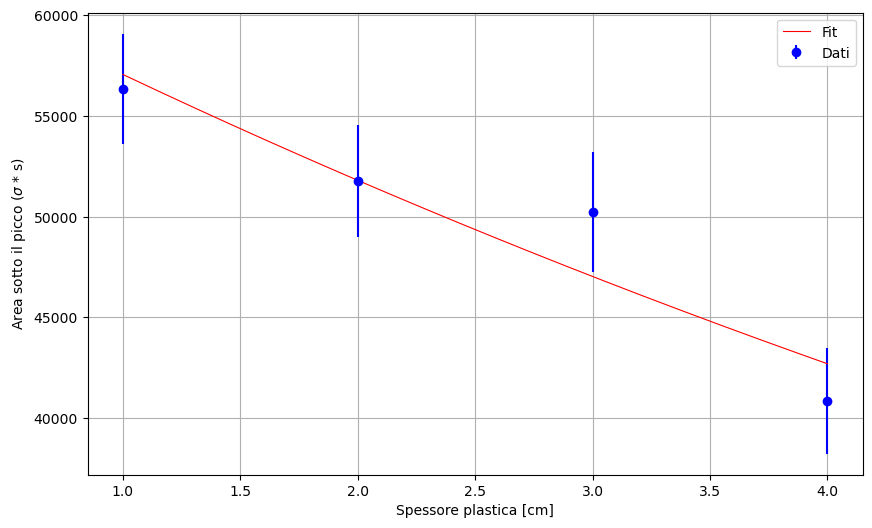

In [134]:
x = np.linspace(1, 4, 10000)
y = exp(x, vals[0], vals[1])
plt.figure(figsize = (10, 6))
plt.errorbar([1, 2, 3, 4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
             yerr = [prop_err_mol(s1, sig1, err_s1, err_sig1),
                     prop_err_mol(s2, sig2, err_s2, err_sig2),
                     prop_err_mol(s3, sig3, err_s3, err_sig3),
                     prop_err_mol(s4, sig4, err_s4, err_sig4) ],
             fmt = 'o', label = 'Dati', color = 'blue',)
plt.plot(x, y, label = 'Fit', color = 'red', linewidth = 0.8)
plt.grid()
plt.xlabel('Spessore plastica [cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.legend()

In [135]:
for i in range(len(vals)):
    if i <= 1:
        print(f"$ \\{pars[i]} $ & {vals[i]:.1E} & {errs[i]:.1E} \\\\ \\hline")
    else:
        print(f"{pars[i]} & {vals[i]:.1E} & {errs[i]:.1E} \\\\ \\hline")

$ \a $ & 6.3E+04 & 3.9E+03 \\ \hline
$ \b $ & 9.7E-02 & 2.4E-02 \\ \hline


### Co

In [136]:
# 1 cm
start_index_C = 100 - 65
end_index_C = 200 - 65 # - bkg_C['Counts'][start_index_C:end_index_C]
y = (Co_C_1_p['Counts'][start_index_C:end_index_C])
pars, vals, errs, *others = LS_fit(Co_C_1_p['ADC'][start_index_C:end_index_C], y,
                                   np.array(np.sqrt(Na_C_1_p['Counts'][start_index_C:end_index_C])), gauss_cost, 
                                   mu = 4000, sigma = 200, S = 50, a = 0)
mu1 = vals[0]
s1 = vals[1]
sig1 = vals[2]
err_s1 = errs[1]
err_sig1 = errs[2]

# 2 cm
start_index = 100 - 65
end_index_C = 200 - 65
pars, vals, errs, *others = LS_fit(Co_C_2_p['ADC'][start_index_C:end_index_C], Co_C_2_p['Counts'][start_index_C:end_index_C],
                                   np.array(np.sqrt(Co_C_2_p['Counts'][start_index_C:end_index_C])), gauss_pol1, 
                                   mu = 4000, sigma = 100, S = 40, a = 0, b = 0)
mu2 = vals[0]
s2 = vals[1]
sig2 = vals[2]
err_s2 = errs[1]
err_sig2 = errs[2]

# 3 cm
start_index = 100 - 65
end_index_C = 200 - 65
pars, vals, errs, *others = LS_fit(Co_C_3_p['ADC'][start_index_C:end_index_C], Co_C_3_p['Counts'][start_index_C:end_index_C],
                                   np.array(np.sqrt(Co_C_3_p['Counts'][start_index_C:end_index_C])), gauss_pol1, 
                                   mu = 4000, sigma = 100, S = 40, a = 0, b = 0)
mu3 = vals[0]
s3 = vals[1]
sig3 = vals[2]
err_s3 = errs[1]
err_sig3 = errs[2]

# 4 cm
start_index = 100 - 65
end_index_C = 200 - 65
pars, vals, errs, *others = LS_fit(Co_C_4_p['ADC'][start_index_C:end_index_C], Co_C_4_p['Counts'][start_index_C:end_index_C],
                                   np.array(np.sqrt(Co_C_4_p['Counts'][start_index_C:end_index_C])), gauss_pol1, 
                                   mu = 4000, sigma = 100, S = 40, a = 0, b = 0)
mu4 = vals[0]
s4 = vals[1]
sig4 = vals[2]
err_s4 = errs[1]
err_sig4 = errs[2]



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 40.41 (χ²/ndof = 0.4)      │              Nfcn = 137              │
│ EDM = 0.000113 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  4.32e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ sigma │  1.56e3   │  0.08e3   │            │            │         │         │       │
│ 2 │ S     │   64.9    │    2.7    │            │            │         │         │       │
│ 3 │ a     │    3.1    │    1.3    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │       mu    sigma        S        a │
├───────┼─────────────────────────────────────┤
│    mu │ 4.92e+03     -0e3       -8      6.8 │
│ sigma │     -0e3 6.56e+03      -53    -62.1 │
│     S │       -8      -53     7.17     -1.0 │
│     a │      6.8    -62.1     -1.0     1.64 │
└───────┴─────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 152.6 (χ²/ndof = 1.6)      │              Nfcn = 223              │
│ EDM = 1.13e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.20e3   │  0.05e3   │            │            │         │         │       │
│ 1 │ sigma │  1.64e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   55.1    │    1.5    │            │            │         │         │       │
│ 3 │ a     │    2.4    │    0.8    │            │            │         │         │       │
│ 4 │ b     │ -0.03e-3  │  0.11e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     2.29e+03       -0.4e3         -1.1         16.5 -2.966578e-3 │
│ sigma │       -0.4e3     2.16e+03        -17.7        -26.5  1.350498e-3 │
│     S │         -1.1        -17.7         2.24         -0.2    12.882e-6 │
│     a │         16.5        -26.5         -0.2        0.673   -62.988e-6 │
│     b │ -2.966578e-3  1.350498e-3    12.882e-6   -62.988e-6     1.13e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 157.4 (χ²/ndof = 1.7)      │              Nfcn = 241              │
│ EDM = 6.15e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.26e3   │  0.05e3   │            │            │         │         │       │
│ 1 │ sigma │  1.65e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   53.6    │    1.5    │            │            │         │         │       │
│ 3 │ a     │    1.8    │    0.8    │            │            │         │         │       │
│ 4 │ b     │  0.01e-3  │  0.10e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     2.29e+03       -0.3e3         -2.7         15.1 -2.821744e-3 │
│ sigma │       -0.3e3     2.28e+03        -18.7        -26.5  1.282240e-3 │
│     S │         -2.7        -18.7         2.15         -0.1    11.081e-6 │
│     a │         15.1        -26.5         -0.1        0.621   -56.644e-6 │
│     b │ -2.821744e-3  1.282240e-3    11.081e-6   -56.644e-6     1.02e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 102.2 (χ²/ndof = 1.1)      │              Nfcn = 235              │
│ EDM = 0.000102 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.06e3   │  0.05e3   │            │            │         │         │       │
│ 1 │ sigma │  1.64e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   54.5    │    1.5    │            │            │         │         │       │
│ 3 │ a     │    1.2    │    0.7    │            │            │         │         │       │
│ 4 │ b     │  0.27e-3  │  0.10e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     2.18e+03       -0.2e3         -1.1         11.7 -2.613255e-3 │
│ sigma │       -0.2e3     2.19e+03        -19.9        -24.0   909.251e-6 │
│     S │         -1.1        -19.9         2.21         -0.1     4.618e-6 │
│     a │         11.7        -24.0         -0.1        0.534   -45.446e-6 │
│     b │ -2.613255e-3   909.251e-6     4.618e-6   -45.446e-6     9.84e-09 │
└───────┴──────────────────────────────────────────────────────────────────┘

### Confronto

In [137]:
pars, vals, errs, *others = LS_fit([1,2,3,4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
                                            [prop_err_mol(s1, sig1, err_s1, err_sig1),
                                             prop_err_mol(s2, sig2, err_s2, err_sig2),
                                             prop_err_mol(s3, sig3, err_s3, err_sig3),
                                             prop_err_mol(s4, sig4, err_s4, err_sig4) ],
                                             exp, a = 1, b = 0.1)
att_C_p_C = vals[1]
err_att_C_p_C = errs[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.495 (χ²/ndof = 0.7)      │              Nfcn = 430              │
│ EDM = 4.59e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   98e3    │    7e3    │            │            │         │         │       │
│ 1 │ b    │   0.028   │   0.023   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 4.26e+07 139.8755 │
│ b │ 139.8755 0.000514 │
└───┴───────────────────┘

In [138]:
for i in range(len(vals)):
    if i <= 1:
        print(f"$ \\{pars[i]} $ & {vals[i]:.1E} & {errs[i]:.1E} \\\\ \\hline")
    else:
        print(f"{pars[i]} & {vals[i]:.1E} & {errs[i]:.1E} \\\\ \\hline")

$ \a $ & 9.8E+04 & 6.5E+03 \\ \hline
$ \b $ & 2.8E-02 & 2.3E-02 \\ \hline


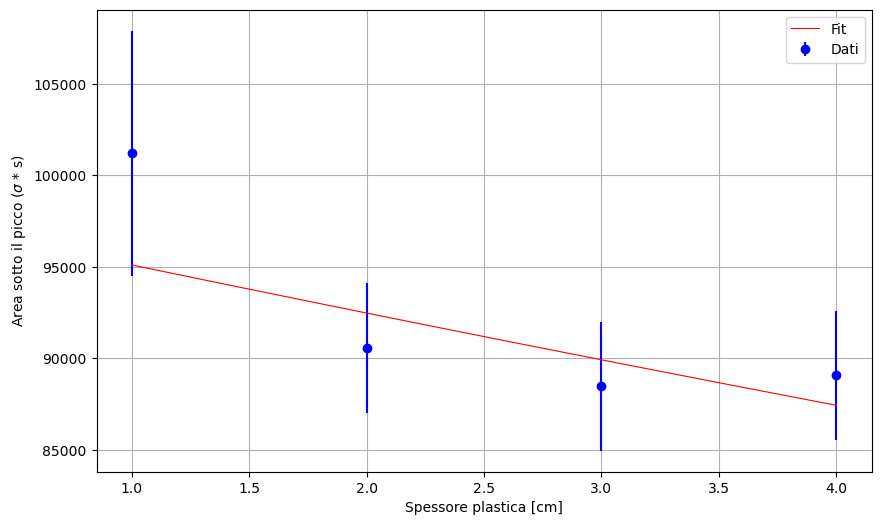

In [139]:
x = np.linspace(1, 4, 10000)
y = exp(x, vals[0], vals[1])
plt.figure(figsize = (10, 6))
plt.errorbar([1, 2, 3, 4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
             yerr = [prop_err_mol(s1, sig1, err_s1, err_sig1),
                     prop_err_mol(s2, sig2, err_s2, err_sig2),
                     prop_err_mol(s3, sig3, err_s3, err_sig3),
                     prop_err_mol(s4, sig4, err_s4, err_sig4) ],
             fmt = 'o', label = 'Dati', color = 'blue',)
plt.plot(x, y, label = 'Fit', color = 'red', linewidth = 0.8)
plt.grid()
plt.xlabel('Spessore plastica [cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.legend()

0.09661763436653723 0.10095637297654018 0.09661763436653723 0.02804662846057771
0.024440699860775125 0.019889554488906332 0.024440699860775125 0.022662109045898913


<ErrorbarContainer object of 3 artists>

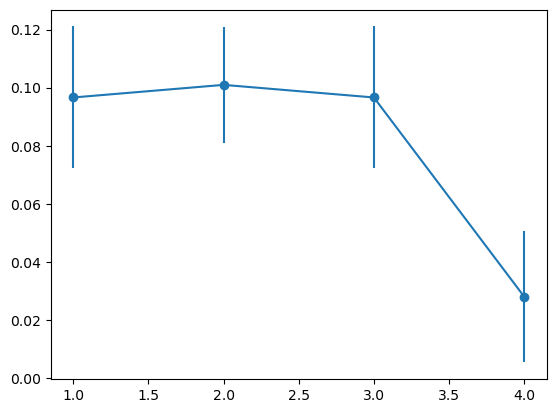

In [166]:
print(att_C_p_N, att_B_p_C, att_C_p_N, att_C_p_C)
print(err_att_C_p_N, err_att_B_p_C, err_att_C_p_N, err_att_C_p_C)
# Plotting the results
plt.errorbar([1,2,3,4], [att_C_p_N, att_B_p_C, att_C_p_N, att_C_p_C], yerr = [err_att_C_p_N, err_att_B_p_C, err_att_C_p_N, err_att_C_p_C], marker = 'o')

# Alluminio

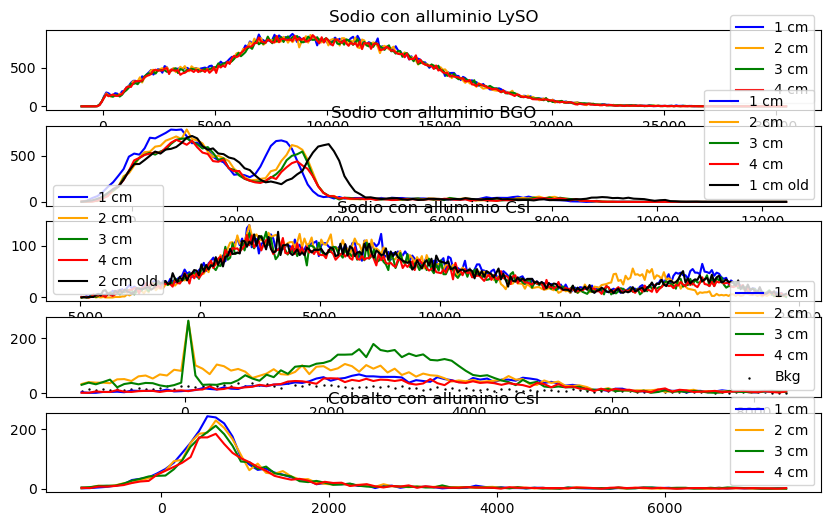

In [141]:
start_index = 0
#spiego nome: sodio_lyso_1cm_alluminio
#LySO

Na_L_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_1.txt', titles = ['ADC', 'Counts'])
Na_L_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_2.txt', titles = ['ADC', 'Counts'])
Na_L_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_3.txt', titles = ['ADC', 'Counts'])
Na_L_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_4.txt', titles = ['ADC', 'Counts'])
#BGO
Na_B_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_1.txt', titles = ['ADC', 'Counts'])
Na_B_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_2.txt', titles = ['ADC', 'Counts'])
Na_B_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_3.txt', titles = ['ADC', 'Counts'])
Na_B_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_4.txt', titles = ['ADC', 'Counts'])
Na_B_1_al_old = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_1(old).txt', titles = ['ADC', 'Counts'])
#CsI
Na_C_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_1.txt', titles = ['ADC', 'Counts'])
Na_C_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_2.txt', titles = ['ADC', 'Counts'])
Na_C_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_3.txt', titles = ['ADC', 'Counts'])
Na_C_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_4.txt', titles = ['ADC', 'Counts'])
Na_C_2_al_old = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_2(old).txt', titles = ['ADC', 'Counts'])
#Cobalto CsI
Co_C_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_csi_1.txt', titles = ['ADC', 'Counts'])
Co_C_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_csi_2.txt', titles = ['ADC', 'Counts'])
Co_C_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_csi_3.txt', titles = ['ADC', 'Counts'])
Co_C_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_csi_4.txt', titles = ['ADC', 'Counts'])
#Cobalto BGO
Co_B_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_bgo_1.txt', titles = ['ADC', 'Counts'])
Co_B_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_bgo_2.txt', titles = ['ADC', 'Counts'])
Co_B_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_bgo_3.txt', titles = ['ADC', 'Counts'])
Co_B_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_bgo_4.txt', titles = ['ADC', 'Counts'])
Fig, axes = plt.subplots(5, 1, figsize = (10, 6))
end_index_L = 380-65
axes[0].plot(Na_L_1_al['ADC'][start_index:end_index_L], Na_L_1_al['Counts'][start_index:end_index_L], label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_al['ADC'][start_index:end_index_L], Na_L_2_al['Counts'][start_index:end_index_L], label = '2 cm', color = 'orange')
axes[0].plot(Na_L_3_al['ADC'][start_index:end_index_L], Na_L_3_al['Counts'][start_index:end_index_L], label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_al['ADC'][start_index:end_index_L], Na_L_4_al['Counts'][start_index:end_index_L], label = '4 cm', color = 'red')
axes[0].legend()
axes[0].set_title('Sodio con alluminio LySO')
end_index_B = 200 - 65
axes[1].plot(Na_B_1_al['ADC'][start_index:end_index_B], Na_B_1_al['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_al['ADC'][start_index:end_index_B], Na_B_2_al['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_al['ADC'][start_index:end_index_B], Na_B_3_al['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].plot(Na_B_4_al['ADC'][start_index:end_index_B], Na_B_4_al['Counts'][start_index:end_index_B], label = '4 cm', color = 'red')
axes[1].plot(Na_B_1_al_old['ADC'][start_index:end_index_B], Na_B_1_al_old['Counts'][start_index:end_index_B], label = '1 cm old', color = 'black')
axes[1].legend()
axes[1].set_title('Sodio con alluminio BGO')
axes[2].set_title('Sodio con alluminio CsI')
end_index_C = 360 - 65
axes[2].plot(Na_C_1_al['ADC'][start_index:end_index_C], Na_C_1_al['Counts'][start_index:end_index_C], label = '1 cm', color = 'blue')
axes[2].plot(Na_C_2_al['ADC'][start_index:end_index_C], Na_C_2_al['Counts'][start_index:end_index_C], label = '2 cm', color = 'orange')
axes[2].plot(Na_C_3_al['ADC'][start_index:end_index_C], Na_C_3_al['Counts'][start_index:end_index_C], label = '3 cm', color = 'green')
axes[2].plot(Na_C_4_al['ADC'][start_index:end_index_C], Na_C_4_al['Counts'][start_index:end_index_C], label = '4 cm', color = 'red')
axes[2].plot(Na_C_2_al_old['ADC'][start_index:end_index_C], Na_C_2_al_old['Counts'][start_index:end_index_C], label = '2 cm old', color = 'black')
axes[2].legend()
start_index = 35
end_index_C = 200 - 65
axes[3].plot(Co_C_1_al['ADC'][start_index:end_index_C], Co_C_1_al['Counts'][start_index:end_index_C], label = '1 cm', color = 'blue')
axes[3].plot(Co_C_2_al['ADC'][start_index:end_index_C], Co_C_2_al['Counts'][start_index:end_index_C], label = '2 cm', color = 'orange')
axes[3].plot(Co_C_3_al['ADC'][start_index:end_index_C], Co_C_3_al['Counts'][start_index:end_index_C], label = '3 cm', color = 'green')
axes[3].plot(Co_C_4_al['ADC'][start_index:end_index_C], Co_C_4_al['Counts'][start_index:end_index_C], label = '4 cm', color = 'red')
axes[3].scatter(bkg_C['ADC'][start_index:end_index_C], bkg_C['Counts'][start_index:end_index_C], label = 'Bkg', color = 'black', s = 0.5)
axes[3].legend()
start_index = 0
end_index_B = 150 - 65
axes[4].set_title('Cobalto con alluminio CsI')
axes[4].plot(Co_B_1_al['ADC'][start_index:end_index_B], Co_B_1_al['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[4].plot(Co_B_2_al['ADC'][start_index:end_index_B], Co_B_2_al['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[4].plot(Co_B_3_al['ADC'][start_index:end_index_B], Co_B_3_al['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[4].plot(Co_B_4_al['ADC'][start_index:end_index_B], Co_B_4_al['Counts'][start_index:end_index_B], label = '4 cm', color = 'red')
axes[4].legend()
# axes[4].scatter(bkg_C['ADC'][start_index:end_index_B], bkg_C['Counts'][start_index:end_index_B], label = 'Bkg', color = 'black', s = 0.5)

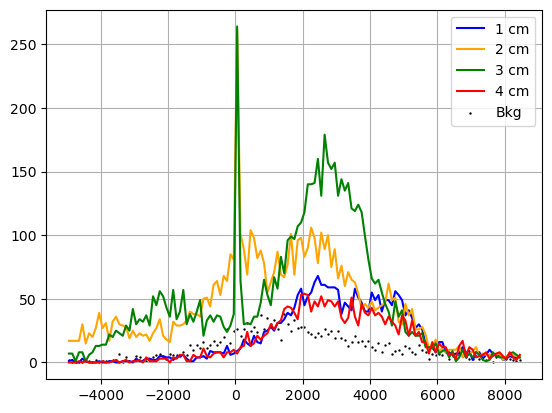

In [142]:
plt.plot(Co_C_1_al['ADC'][start_index:end_index_C], Co_C_1_al['Counts'][start_index:end_index_C], label = '1 cm', color = 'blue')
plt.plot(Co_C_2_al['ADC'][start_index:end_index_C], Co_C_2_al['Counts'][start_index:end_index_C], label = '2 cm', color = 'orange')
plt.plot(Co_C_3_al['ADC'][start_index:end_index_C], Co_C_3_al['Counts'][start_index:end_index_C], label = '3 cm', color = 'green')
plt.plot(Co_C_4_al['ADC'][start_index:end_index_C], Co_C_4_al['Counts'][start_index:end_index_C], label = '4 cm', color = 'red')
plt.scatter(bkg_C['ADC'][start_index:end_index_C], bkg_C['Counts'][start_index:end_index_C], label = 'Bkg', color = 'black', s = 0.5)
plt.legend()
plt.grid()

## LySO

Text(0.5, 1.0, 'Sodio con alluminio LySO senza fondo')

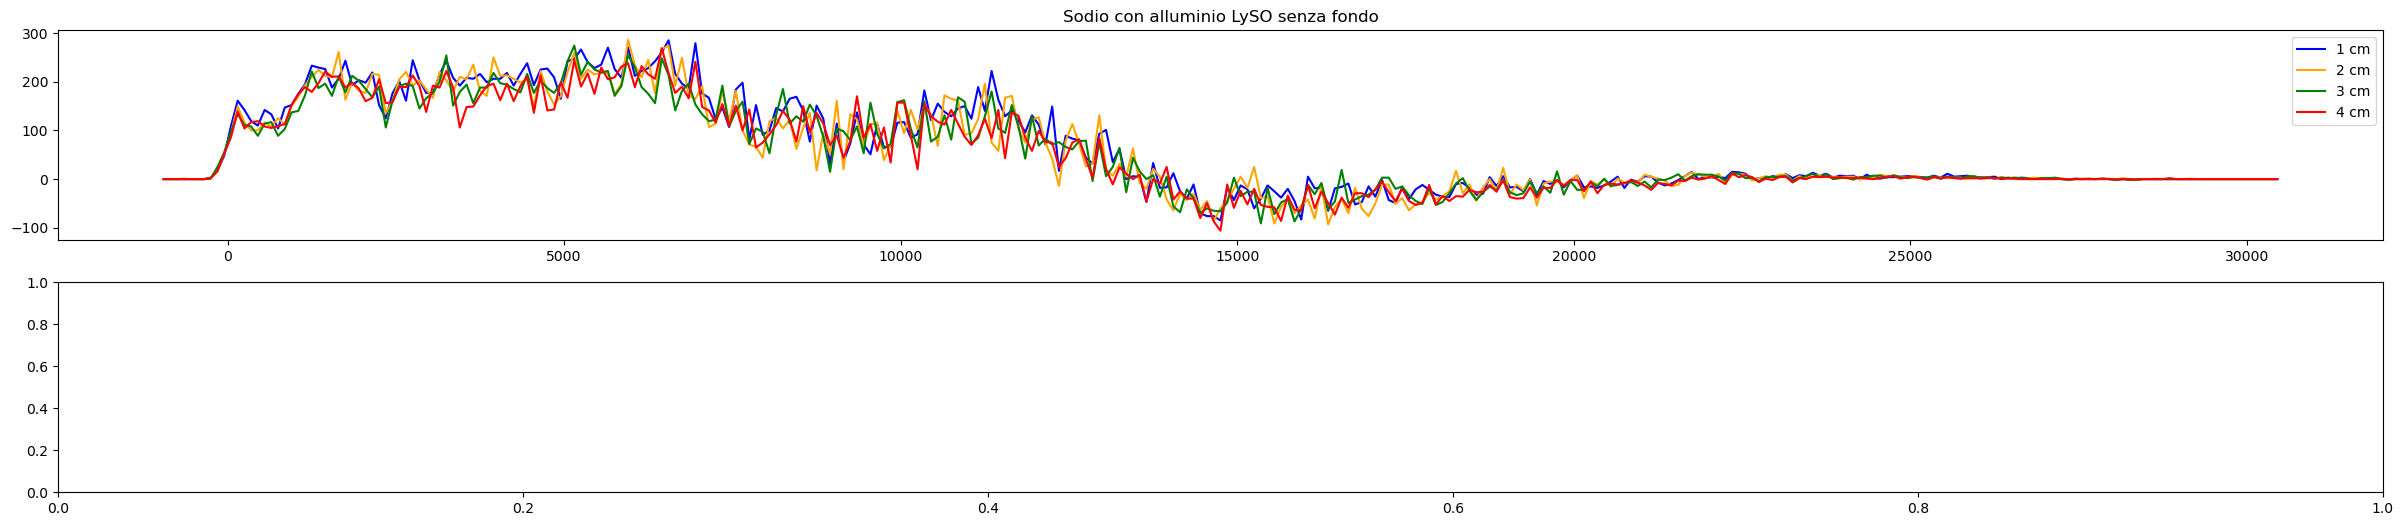

In [143]:
#tolgo sempre il fondo a lyso
Na_L_1_nobkg_al = Na_L_1_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_2_nobkg_al = Na_L_2_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_3_nobkg_al = Na_L_3_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_4_nobkg_al = Na_L_4_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Fig, axes = plt.subplots(2, 1, figsize = (30, 6))
axes[0].plot(Na_L_1_al['ADC'][start_index:end_index_L], Na_L_1_nobkg_al, label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_al['ADC'][start_index:end_index_L], Na_L_2_nobkg_al, label = '2 cm', color = 'orange')
axes[0].plot(Na_L_3_al['ADC'][start_index:end_index_L], Na_L_3_nobkg_al, label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_al['ADC'][start_index:end_index_L], Na_L_4_nobkg_al, label = '4 cm', color = 'red')
axes[0].legend()
axes[0].set_title('Sodio con alluminio LySO senza fondo')
#pure questo fa schifo!

## BGO

### Na

In [144]:
si1 = 99 - 65
ei1 = 125 - 65
pars, vals, errs, *others = LS_fit(Na_B_1_al['ADC'][si1 : ei1], Na_B_1_al['Counts'][si1 : ei1], np.array(np.sqrt(Na_B_1_al['Counts'][si1 : ei1])),
                                   gauss_pol3, mu = 3500, sigma = 400, S = 400, b = 0, c = 0, d = 0, a = 0)
mu1 = vals[0]
sig1 = vals[1]
a1 = vals[2]
er_sig1 = errs[1]
er_a1 = errs[2]

si2 = 94 - 65
ei2 = 125 - 65
pars, vals, errs, *others = LS_fit(Na_B_2_al['ADC'][si2 : ei2], Na_B_2_al['Counts'][si2 : ei2], np.array(np.sqrt(Na_B_2_al['Counts'][si2 : ei2])),
                                      gauss_pol3, mu = 3500, sigma = 400, S = 400, b = 0, c = 0, d = 0, a = 0)
mu2 = vals[0]
sig2 = vals[1]
a2 = vals[2]
er_sig2 = errs[1]
er_a2 = errs[2]

si3 = 97 - 65
ei = 130 - 65
pars, vals, errs, *others = LS_fit(Na_B_3_al['ADC'][si3 : ei], Na_B_3_al['Counts'][si3 : ei], np.array(np.sqrt(Na_B_3_al['Counts'][si3 : ei])),
                                      gauss_pol3, mu = 4000, sigma = 400, S = 400, b = 0, c = 0, d = 0, a = 0)
mu3 = vals[0]  
sig3 = vals[1]
a3 = vals[2]
er_sig3 = errs[1]
er_a3 = errs[2]

si4 = 96 - 65
ei = 130 - 65
pars, vals, errs, *others = LS_fit(Na_B_4_al['ADC'][si4 : ei], Na_B_4_al['Counts'][si4 : ei], np.array(np.sqrt(Na_B_4_al['Counts'][si4 : ei])),
                                      gauss_pol3, mu = 3500, sigma = 400, S = 400, b = 0, c = 0, d = 0, a = 0)
mu4 = vals[0]
sig4 = vals[1]
a4 = vals[2]
er_sig4 = errs[1]
er_a4 = errs[2]

print(mu1, mu2, mu3, mu4)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 19.09 (χ²/ndof = 1.0)      │              Nfcn = 544              │
│ EDM = 2.31e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.864e3  │  0.007e3  │            │            │         │         │       │
│ 1 │ sigma │    285    │     7     │            │            │         │         │       │
│ 2 │ S     │    593    │    14     │            │            │         │         │       │
│ 3 │ a     │  1.879e3  │  0.015e3  │            │            │         │         │       │
│ 4 │ b     │  -1.293   │   0.005   │            │            │         │         │       │
│ 5 │ c     │ 302.1e-6  │  1.1e-6   │            │            │         │         │       │
│ 6 │ d     │ -23.43e-9 │  0.18e-9  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                 mu              sigma                  S                  a                  b                  c                  d │
├───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │               46.5                -20                 10                 10          -2.807e-3       -469.0737e-9   95.273420594e-12 │
│ sigma │                -20               44.7                -30                -30           1.643e-3        871.3213e-9   62.276531128e-12 │
│     S │                 10                -30                183            -0.05e3           5.647e-3       1.5783970e-6 -101.907004728e-12 │
│     a │                 10                -30            -0.05e3                225         -56.210e-3      -3.8375849e-6  1.124360105742e-9 │
│     b │          -2.807e-3           1.643e-3           5.647e-3         -56.210e-3           2.43e-05         -1.6870e-9    -201.663578e-15 │
│     c │       -469.0737e-9        871.3213e-9       1.5783970e-6      -3.8375849e-6         -1.6870e-9           1.29e-12       -158.411e-18 │
│     d │   95.273420594e-12   62.276531128e-12 -101.907004728e-12  1.124360105742e-9    -201.663578e-15       -158.411e-18           3.29e-20 │
└───────┴──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.92 (χ²/ndof = 1.5)      │              Nfcn = 585              │
│ EDM = 8.71e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.111e3  │  0.006e3  │            │            │         │         │       │
│ 1 │ sigma │    268    │     6     │            │            │         │         │       │
│ 2 │ S     │    526    │    13     │            │            │         │         │       │
│ 3 │ a     │  1.573e3  │  0.012e3  │            │            │         │         │       │
│ 4 │ b     │  -0.967   │   0.005   │            │            │         │         │       │
│ 5 │ c     │ 200.4e-6  │  1.0e-6   │            │            │         │         │       │
│ 6 │ d     │ -13.68e-9 │  0.17e-9  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                mu             sigma                 S                 a                 b                 c                 d │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │              42.1               -20                10                20         -2.215e-3      -532.8606e-9  57.023183439e-12 │
│ sigma │               -20              40.8               -30               -20         -1.217e-3       412.0145e-9  155.55550894e-12 │
│     S │                10               -30               163           -0.01e3         -0.915e-3       269.5773e-9  82.744441478e-12 │
│     a │                20               -20           -0.01e3               132        -39.372e-3     -1.0700377e-6 725.427692726e-12 │
│     b │         -2.215e-3         -1.217e-3         -0.915e-3        -39.372e-3          2.06e-05        -1.8611e-9   -167.530262e-15 │
│     c │      -532.8606e-9       412.0145e-9       269.5773e-9     -1.0700377e-6        -1.8611e-9          1.07e-12      -132.756e-18 │
│     d │  57.023183439e-12  155.55550894e-12  82.744441478e-12 725.427692726e-12   -167.530262e-15      -132.756e-18          2.97e-20 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 41.77 (χ²/ndof = 1.6)      │              Nfcn = 695              │
│ EDM = 2.76e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.139e3  │  0.007e3  │            │            │         │         │       │
│ 1 │ sigma │    254    │     7     │            │            │         │         │       │
│ 2 │ S     │    452    │    12     │            │            │         │         │       │
│ 3 │ a     │  1.410e3  │  0.011e3  │            │            │         │         │       │
│ 4 │ b     │  -0.843   │   0.004   │            │            │         │         │       │
│ 5 │ c     │ 170.7e-6  │  0.8e-6   │            │            │         │         │       │
│ 6 │ d     │ -11.43e-9 │  0.11e-9  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                mu             sigma                 S                 a                 b                 c                 d │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │              48.4               -20                10                10         -2.664e-3      -449.6903e-9  72.828341750e-12 │
│ sigma │               -20              44.4               -40               -20          1.569e-3       585.7797e-9   6.922150135e-12 │
│     S │                10               -40               150           -0.01e3          0.784e-3       329.0432e-9  -6.103268084e-12 │
│     a │                10               -20           -0.01e3               115        -30.564e-3     -1.2044109e-6 527.282166204e-12 │
│     b │         -2.664e-3          1.569e-3          0.784e-3        -30.564e-3          1.33e-05        -1.0330e-9    -79.543886e-15 │
│     c │      -449.6903e-9       585.7797e-9       329.0432e-9     -1.2044109e-6        -1.0330e-9          6.04e-13       -69.035e-18 │
│     d │  72.828341750e-12   6.922150135e-12  -6.103268084e-12 527.282166204e-12    -79.543886e-15       -69.035e-18          1.29e-20 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.95 (χ²/ndof = 1.3)      │              Nfcn = 651              │
│ EDM = 6.39e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.141e3  │  0.009e3  │            │            │         │         │       │
│ 1 │ sigma │    268    │     8     │            │            │         │         │       │
│ 2 │ S     │    346    │    11     │            │            │         │         │       │
│ 3 │ a     │  1.19e3   │  0.01e3   │            │            │         │         │       │
│ 4 │ b     │  -0.6762  │  0.0034   │            │            │         │         │       │
│ 5 │ c     │ 130.9e-6  │  0.7e-6   │            │            │         │         │       │
│ 6 │ d     │ -8.44e-9  │  0.10e-9  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                mu             sigma                 S                 a                 b                 c                 d │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │              74.9               -30                10                20         -3.078e-3      -505.8213e-9  82.282967170e-12 │
│ sigma │               -30              68.8               -40               -30          1.473e-3       637.7675e-9  22.108921507e-12 │
│     S │                10               -40               117               -10          0.637e-3       319.6665e-9   2.377457998e-12 │
│     a │                20               -30               -10                98        -26.027e-3      -933.2655e-9 430.876628046e-12 │
│     b │         -3.078e-3          1.473e-3          0.637e-3        -26.027e-3          1.15e-05        -910.3e-12    -67.939510e-15 │
│     c │      -505.8213e-9       637.7675e-9       319.6665e-9      -933.2655e-9        -910.3e-12          5.12e-13       -57.929e-18 │
│     d │  82.282967170e-12  22.108921507e-12   2.377457998e-12 430.876628046e-12    -67.939510e-15       -57.929e-18           1.1e-20 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

2863.5717546046026 3111.113761275154 3139.3682779321007 3141.018772327328


In [145]:
pars, vals, errs, *others = LS_fit([1,2,3,4], [a1*sig1, a2*sig2, a3*sig3, a4*sig4], 
                                            [prop_err_mol(a1, sig1, er_a1, er_sig1),
                                             prop_err_mol(a2, sig2, er_a2, er_sig2),
                                             prop_err_mol(a3, sig3, er_a3, er_sig3),
                                             prop_err_mol(a4, sig4, er_a4, er_sig4) ],
                                             exp, a = 1, b = 0.1)
att_B_al = vals[1]
err_att_B_al = errs[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.231 (χ²/ndof = 0.1)      │              Nfcn = 359              │
│ EDM = 3.75e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   208e3   │    9e3    │            │            │         │         │       │
│ 1 │ b    │   0.199   │   0.017   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │  7.65e+07 132.03488 │
│ b │ 132.03488   0.00028 │
└───┴─────────────────────┘

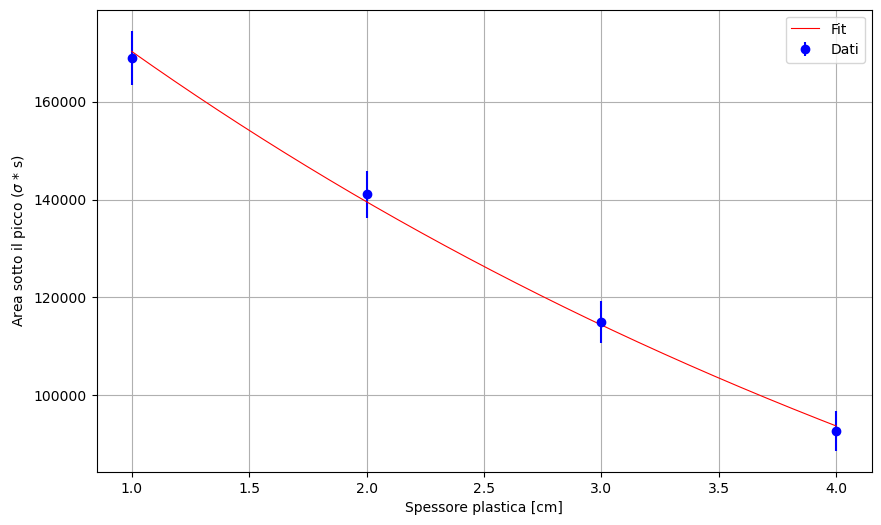

In [146]:
x = np.linspace(1, 4, 10000)
y = exp(x, vals[0], vals[1])
plt.figure(figsize = (10, 6))
plt.errorbar([1, 2, 3, 4], [a1*sig1, a2*sig2, a3*sig3, a4*sig4], 
             yerr = [prop_err_mol(a1, sig1, er_a1, er_sig1),
                        prop_err_mol(a2, sig2, er_a2, er_sig2),
                        prop_err_mol(a3, sig3, er_a3, er_sig3),
                        prop_err_mol(a4, sig4, er_a4, er_sig4) ],
             fmt = 'o', label = 'Dati', color = 'blue',)
plt.plot(x, y, label = 'Fit', color = 'red', linewidth = 0.8)
plt.grid()
plt.xlabel('Spessore plastica [cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.legend()

### Co

In [147]:
si1 = 65 - 65
ei1 = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_1_al['ADC'][si1 : ei1], Co_B_1_al['Counts'][si1 : ei1], np.array(np.sqrt(Co_B_1_al['Counts'][si1 : ei1])),
                                   gauss_pol1, mu = 500, sigma = 300, S = 200, a = 0, b = 0)
mu1 = vals[0]
sig1 = vals[1]
a1 = vals[2]
er_sig1 = errs[1]
er_a1 = errs[2]

si1 = 65 - 65
ei1 = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_2_al['ADC'][si1 : ei1], Co_B_2_al['Counts'][si1 : ei1], np.array(np.sqrt(Co_B_2_al['Counts'][si1 : ei1])),
                                      gauss_pol1, mu = 500, sigma = 300, S = 200, a = 0, b = 0)
mu2 = vals[0]
sig2 = vals[1]
a2 = vals[2]
er_sig2 = errs[1]
er_a2 = errs[2]

si1 = 65 - 65
ei1 = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_3_al['ADC'][si1 : ei1], Co_B_3_al['Counts'][si1 : ei1], np.array(np.sqrt(Co_B_3_al['Counts'][si1 : ei1])),
                                      gauss_pol1, mu = 500, sigma = 300, S = 200, a = 0, b = 0)
mu3 = vals[0]  
sig3 = vals[1]
a3 = vals[2]
er_sig3 = errs[1]
er_a3 = errs[2]

si1 = 65 - 65
ei1 = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_4_al['ADC'][si1 : ei1], Co_B_4_al['Counts'][si1 : ei1], np.array(np.sqrt(Co_B_4_al['Counts'][si1 : ei1])),
                                      gauss_pol1, mu = 500, sigma = 300, S = 200, a = 0, b = 0)
mu4 = vals[0]
sig4 = vals[1]
a4 = vals[2]
er_sig4 = errs[1]
er_a4 = errs[2]

# print(mu1, mu2, mu3, mu4)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 104.8 (χ²/ndof = 3.5)      │              Nfcn = 157              │
│ EDM = 0.000123 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    598    │    10     │            │            │         │         │       │
│ 1 │ sigma │    399    │    13     │            │            │         │         │       │
│ 2 │ S     │    187    │     7     │            │            │         │         │       │
│ 3 │ a     │    6.0    │    0.7    │            │            │         │         │       │
│ 4 │ b     │  4.2e-3   │  0.5e-3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────┐
│       │          mu       sigma           S           a           b │
├───────┼─────────────────────────────────────────────────────────────┤
│    mu │         110      0.02e3         -10        -0.3 -1.06062e-3 │
│ sigma │      0.02e3         178         -60        -4.6 -1.13573e-3 │
│     S │         -10         -60        45.6         0.9    79.72e-6 │
│     a │        -0.3        -4.6         0.9       0.485    65.35e-6 │
│     b │ -1.06062e-3 -1.13573e-3    79.72e-6    65.35e-6    2.47e-07 │
└───────┴─────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 113.2 (χ²/ndof = 3.8)      │              Nfcn = 157              │
│ EDM = 0.000107 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    607    │    11     │            │            │         │         │       │
│ 1 │ sigma │    404    │    15     │            │            │         │         │       │
│ 2 │ S     │    169    │     6     │            │            │         │         │       │
│ 3 │ a     │    6.9    │    0.8    │            │            │         │         │       │
│ 4 │ b     │  4.4e-3   │  0.5e-3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────┐
│       │          mu       sigma           S           a           b │
├───────┼─────────────────────────────────────────────────────────────┤
│    mu │         129      0.03e3         -10        -0.5 -1.31225e-3 │
│ sigma │      0.03e3         213         -70        -5.6 -1.32114e-3 │
│     S │         -10         -70        41.4         0.9    86.82e-6 │
│     a │        -0.5        -5.6         0.9       0.586    53.22e-6 │
│     b │ -1.31225e-3 -1.32114e-3    86.82e-6    53.22e-6    2.75e-07 │
└───────┴─────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 102.4 (χ²/ndof = 3.4)      │              Nfcn = 168              │
│ EDM = 3.69e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    645    │    13     │            │            │         │         │       │
│ 1 │ sigma │    417    │    17     │            │            │         │         │       │
│ 2 │ S     │    152    │     6     │            │            │         │         │       │
│ 3 │ a     │    8.7    │    1.0    │            │            │         │         │       │
│ 4 │ b     │  2.2e-3   │  0.6e-3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────┐
│       │          mu       sigma           S           a           b │
├───────┼─────────────────────────────────────────────────────────────┤
│    mu │         159      0.05e3         -10        -0.4 -1.76554e-3 │
│ sigma │      0.05e3         286         -70        -9.5  -369.89e-6 │
│     S │         -10         -70        36.8         1.2    16.34e-6 │
│     a │        -0.4        -9.5         1.2        1.05  -146.90e-6 │
│     b │ -1.76554e-3  -369.89e-6    16.34e-6  -146.90e-6    3.27e-07 │
└───────┴─────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 51.66 (χ²/ndof = 1.7)      │              Nfcn = 156              │
│ EDM = 8.63e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    632    │    13     │            │            │         │         │       │
│ 1 │ sigma │    420    │    14     │            │            │         │         │       │
│ 2 │ S     │    142    │     5     │            │            │         │         │       │
│ 3 │ a     │    6.9    │    0.8    │            │            │         │         │       │
│ 4 │ b     │  3.9e-3   │  0.6e-3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────┐
│       │          mu       sigma           S           a           b │
├───────┼─────────────────────────────────────────────────────────────┤
│    mu │         171      0.03e3          -5        -0.2 -1.94405e-3 │
│ sigma │      0.03e3         206         -46        -6.3 -1.03426e-3 │
│     S │          -5         -46        27.6         0.4   -58.87e-6 │
│     a │        -0.2        -6.3         0.4       0.705     2.85e-6 │
│     b │ -1.94405e-3 -1.03426e-3   -58.87e-6     2.85e-6     3.1e-07 │
└───────┴─────────────────────────────────────────────────────────────┘

In [148]:
pars, vals, errs, *others = LS_fit([1,2,3,4], [a1*sig1, a2*sig2, a3*sig3, a4*sig4], 
                                            [prop_err_mol(a1, sig1, er_a1, er_sig1),
                                             prop_err_mol(a2, sig2, er_a2, er_sig2),
                                             prop_err_mol(a3, sig3, er_a3, er_sig3),
                                             prop_err_mol(a4, sig4, er_a4, er_sig4) ],
                                             exp, a = 1, b = 0.1)
att_B_al = vals[1]
err_att_B_al = errs[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.03267 (χ²/ndof = 0.0)    │              Nfcn = 399              │
│ EDM = 4.36e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   80e3    │    5e3    │            │            │         │         │       │
│ 1 │ b    │   0.076   │   0.023   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 2.42e+07 100.7758 │
│ b │ 100.7758 0.000511 │
└───┴───────────────────┘

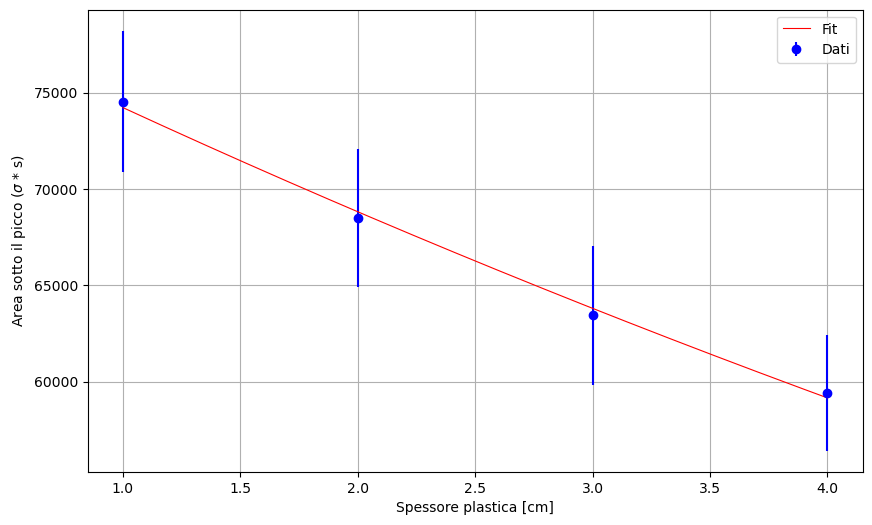

In [149]:
x = np.linspace(1, 4, 10000)
y = exp(x, vals[0], vals[1])
plt.figure(figsize = (10, 6))
plt.errorbar([1, 2, 3, 4], [a1*sig1, a2*sig2, a3*sig3, a4*sig4], 
             yerr = [prop_err_mol(a1, sig1, er_a1, er_sig1),
                        prop_err_mol(a2, sig2, er_a2, er_sig2),
                        prop_err_mol(a3, sig3, er_a3, er_sig3),
                        prop_err_mol(a4, sig4, er_a4, er_sig4) ],
             fmt = 'o', label = 'Dati', color = 'blue',)
plt.plot(x, y, label = 'Fit', color = 'red', linewidth = 0.8)
plt.grid()
plt.xlabel('Spessore plastica [cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.legend()

## CsI

### Na

In [150]:
# 1 cm
start_index = 280 - 65
end_index_C = 370 - 65
pars, vals, errs, *others = LS_fit_lims(Na_C_1_al['ADC'][start_index:end_index_C], Na_C_1_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_1_al['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 22000, sigma = 500, S = 100, a = 0, b = 0, limits = [['sigma', (0, None)]])
mu1 = vals[0]
s1 = vals[1]
sig1 = vals[2]
err_S1 = errs[1]
err_sig1 = errs[2]

# 2 cm
start_index = 260 - 65
end_index_C = 370 - 65
pars, vals, errs, *others = LS_fit_lims(Na_C_2_al['ADC'][start_index:end_index_C], Na_C_2_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_2_al['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 19000, sigma = 500, S = 40, a = 80, b = 0, limits = [['S', (0, None)]])
mu2 = vals[0]
s2 = vals[1]
sig2 = vals[2]
err_S2 = errs[1]
err_sig2 = errs[2]

#2 cm old
start_index = 270 - 65
end_index_C = 370 - 65
pars, vals, errs, *others = LS_fit_lims(Na_C_2_al_old['ADC'][start_index:end_index_C], Na_C_2_al_old['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_2_al_old['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 19000, sigma = 500, S = 40, a = 80, b = 0, limits = [['S', (0, None)]])
mu2_old = vals[0]
s2_old = vals[1]
sig2_old = vals[2]
err_S2_old = errs[1]
err_sig2_old = errs[2]

# 3 cm
start_index = 285 - 65
end_index_C = 360 - 65
pars, vals, errs, *others = LS_fit_lims(Na_C_3_al['ADC'][start_index:end_index_C], Na_C_3_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_3_al['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 19000, sigma = 500, S = 100, a = 0, b = 0, limits = [['sigma', (0, None)]])
mu3 = vals[0]
s3 = vals[1]
sig3 = vals[2]
err_S3 = errs[1]
err_sig3 = errs[2]

# 4 cm
start_index = 275 - 65
end_index_C = 380 - 65
pars, vals, errs, *others = LS_fit_lims(Na_C_4_al['ADC'][start_index:end_index_C], Na_C_4_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_4_al['Counts'][start_index:end_index_C])), gauss_pol2, 
                                   mu = 21000, sigma = vals[1], S = 40, a = 80, b = -0.006, c= 0, limits = [['sigma', (0, None)]])
mu4 = vals[0]
s4 = vals[1]
sig4 = vals[2]
err_S4 = errs[1]
err_sig4 = errs[2]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 64.4 (χ²/ndof = 0.8)       │              Nfcn = 255              │
│ EDM = 9.76e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  20.80e3  │  0.05e3   │            │            │    0    │         │       │
│ 1 │ sigma │  1.23e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   42.4    │    1.7    │            │            │         │         │       │
│ 3 │ a     │    35     │     4     │            │            │         │         │       │
│ 4 │ b     │ -1.25e-3  │  0.15e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     2.72e+03       -0.8e3         -1.1           82 -3.449584e-3 │
│ sigma │       -0.8e3     2.69e+03        -28.9          -79  2.725125e-3 │
│     S │         -1.1        -28.9         2.94         -1.0    40.100e-6 │
│     a │           82          -79         -1.0         12.8  -531.087e-6 │
│     b │ -3.449584e-3  2.725125e-3    40.100e-6  -531.087e-6     2.24e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 113.7 (χ²/ndof = 1.1)      │              Nfcn = 267              │
│ EDM = 3.4e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  18.50e3  │  0.05e3   │            │            │    0    │         │       │
│ 1 │ sigma │  1.12e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   38.5    │    1.7    │            │            │         │         │       │
│ 3 │ a     │   24.6    │    2.8    │            │            │         │         │       │
│ 4 │ b     │ -0.89e-3  │  0.12e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │      2.7e+03       -0.9e3          1.3           54 -2.330309e-3 │
│ sigma │       -0.9e3      2.3e+03        -23.8          -76  3.094951e-3 │
│     S │          1.3        -23.8         2.84         -1.0    39.465e-6 │
│     a │           54          -76         -1.0         7.86  -336.289e-6 │
│     b │ -2.330309e-3  3.094951e-3    39.465e-6  -336.289e-6     1.46e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 104.9 (χ²/ndof = 1.1)      │              Nfcn = 277              │
│ EDM = 7.89e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  20.96e3  │  0.07e3   │            │            │    0    │         │       │
│ 1 │ sigma │  -1.41e3  │  0.07e3   │            │            │         │         │       │
│ 2 │ S     │   30.2    │    1.4    │            │            │         │         │       │
│ 3 │ a     │   33.5    │    2.6    │            │            │         │         │       │
│ 4 │ b     │ -1.24e-3  │  0.11e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │      4.7e+03          0e3         -4.9           76 -3.504393e-3 │
│ sigma │          0e3     4.35e+03         25.2           31  -339.006e-6 │
│     S │         -4.9         25.2         1.87         -0.6    22.194e-6 │
│     a │           76           31         -0.6         6.62  -284.404e-6 │
│     b │ -3.504393e-3  -339.006e-6    22.194e-6  -284.404e-6     1.28e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 93.44 (χ²/ndof = 1.3)      │              Nfcn = 343              │
│ EDM = 1.76e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  21.11e3  │  0.11e3   │            │            │    0    │         │       │
│ 1 │ sigma │  -1.67e3  │  0.16e3   │            │            │         │         │       │
│ 2 │ S     │   27.2    │    1.7    │            │            │         │         │       │
│ 3 │ a     │    32     │     6     │            │            │         │         │       │
│ 4 │ b     │ -1.36e-3  │  0.27e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     1.16e+04     -0.003e6         19.2          455 -23.27911e-3 │
│ sigma │     -0.003e6      2.7e+04       -163.9           53  11.41480e-3 │
│     S │         19.2       -163.9         3.06         -1.2    -63.17e-6 │
│     a │          455           53         -1.2         30.3  -1.38173e-3 │
│     b │ -23.27911e-3  11.41480e-3    -63.17e-6  -1.38173e-3     7.11e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 104.9 (χ²/ndof = 1.1)      │             Nfcn = 1006              │
│ EDM = 3.32e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  21.12e3  │  0.07e3   │            │            │    0    │         │       │
│ 1 │ sigma │  -1.54e3  │  0.08e3   │            │            │         │         │       │
│ 2 │ S     │   25.6    │    1.2    │            │            │         │         │       │
│ 3 │ a     │   165.1   │    2.2    │            │            │         │         │       │
│ 4 │ b     │ -14.10e-3 │  0.14e-3  │            │            │         │         │       │
│ 5 │ c     │  302e-9   │   4e-9    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │               mu            sigma                S                a                b                c │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │         5.21e+03              2e3             -8.2               53      -168.902e-6 -79.391551292e-9 │
│ sigma │              2e3         6.91e+03             21.2               60       708.288e-6 -85.420725869e-9 │
│     S │             -8.2             21.2              1.4             -0.5        -8.787e-6   1.024881011e-9 │
│     a │               53               60             -0.5             4.68      -216.401e-6   1.379889358e-9 │
│     b │      -168.902e-6       708.288e-6        -8.787e-6      -216.401e-6         2.11e-08     -489.422e-15 │
│     c │ -79.391551292e-9 -85.420725869e-9   1.024881011e-9   1.379889358e-9     -489.422e-15         1.72e-17 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [151]:
pars, vals, errs, *others = LS_fit_lims([1, 2, 3,4], [abs(s1*sig1), abs(s2*sig2),  abs(s3*sig3), abs(s4*sig4)], 
                                            [prop_err_mol(s1, sig1, err_S1, err_sig1),
                                             prop_err_mol(s2, sig2, err_S2, err_sig2),
                                             prop_err_mol(s3, sig3, err_S3, err_sig3),
                                             prop_err_mol(s4, sig4, err_S4, err_sig4) ],
                                             exp, a = 1, b = 0.1, limits = [['b', (0, None)]])
att_C_al = vals[1]
err_att_C_al = errs[1]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.094 (χ²/ndof = 1.0)      │              Nfcn = 219              │
│ EDM = 2.61e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   55e3    │    4e3    │            │            │    0    │         │       │
│ 1 │ b    │   0.085   │   0.031   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 1.77e+07 116.9120 │
│ b │ 116.9120 0.000968 │
└───┴───────────────────┘

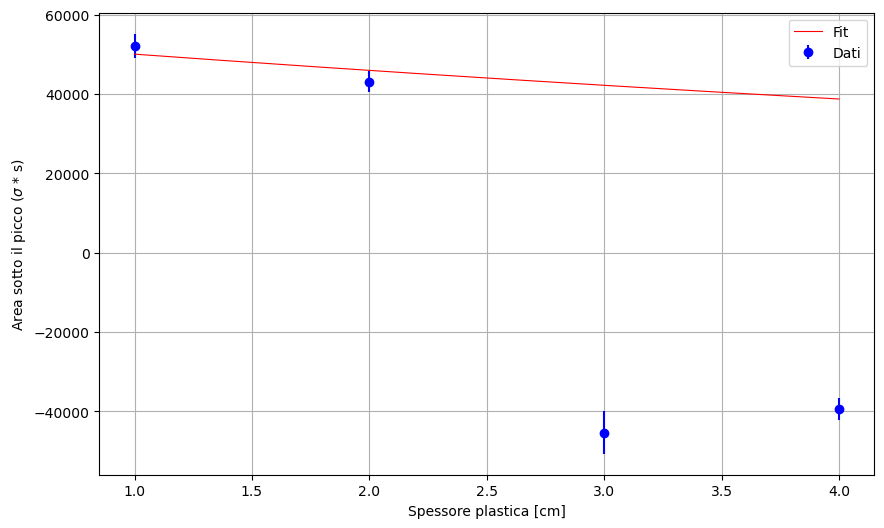

In [152]:
x = np.linspace(1, 4, 10000)
y = exp(x, vals[0], vals[1])
plt.figure(figsize = (10, 6))
plt.errorbar([1, 2, 3, 4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
             yerr = [prop_err_mol(s1, sig1, err_S1, err_sig1),
                     prop_err_mol(s2, sig2, err_S2, err_sig2),
                     prop_err_mol(s3, sig3, err_S3, err_sig3),
                     prop_err_mol(s4, sig4, err_S4, err_sig4) ],
             fmt = 'o', label = 'Dati', color = 'blue',)
plt.plot(x, y, label = 'Fit', color = 'red', linewidth = 0.8)
plt.grid()
plt.xlabel('Spessore plastica [cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.legend()

### Co

In [153]:
# 1 cm
start_index = 90-65
end_index_C = 210 - 65
pars, vals, errs, *others = LS_fit_lims(Co_C_1_al['ADC'][start_index:end_index_C], Co_C_1_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Co_C_1_al['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 3000, sigma = 1000, S = 100, a = 0, b = 0, limits = [['sigma', (0, None)]])
mu1 = vals[0]
s1 = vals[1]
sig1 = vals[2]
err_S1 = errs[1]
err_sig1 = errs[2]

# 2 cm
start_index = 90-65
end_index_C = 210 - 65
pars, vals, errs, *others = LS_fit_lims(Co_C_2_al['ADC'][start_index:end_index_C], Co_C_2_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Co_C_2_al['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 3000, sigma = 500, S = 50, a = 0, b = 0, limits = [['S', (0, None)]])
mu2 = vals[0]
s2 = vals[1]
sig2 = vals[2]
err_S2 = errs[1]
err_sig2 = errs[2]


# 3 cm
start_index = 100-65
end_index_C = 200 - 65
pars, vals, errs, *others = LS_fit_lims(Co_C_3_al['ADC'][start_index:end_index_C], Co_C_3_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Co_C_3_al['Counts'][start_index:end_index_C])), gauss_pol2, 
                                   mu = 3000, sigma = 500, S = 50, a = 0, b = 0, c = 0, limits = [['sigma', (0, None)]])
mu3 = vals[0]
s3 = vals[1]
sig3 = vals[2]
err_S3 = errs[1]
err_sig3 = errs[2]

# 4 cm
start_index = 100-65
end_index_C = 210 - 65
pars, vals, errs, *others = LS_fit(Co_C_4_al['ADC'][start_index : end_index_C], Co_C_4_al['Counts'][start_index : end_index_C], np.array(np.sqrt(Co_C_4_al['Counts'][start_index : end_index_C])),
                                      gauss_pol2, mu = 2500, sigma = 1000, S = 50, a = 2, b = 0, c = 0)
mu4 = vals[0]
sig4 = vals[1]
s4 = vals[2]
err_sig4 = errs[1]
err_S4 = errs[2]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 161.1 (χ²/ndof = 1.4)      │              Nfcn = 170              │
│ EDM = 1.71e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.15e3   │  0.04e3   │            │            │    0    │         │       │
│ 1 │ sigma │  1.61e3   │  0.04e3   │            │            │         │         │       │
│ 2 │ S     │   55.4    │    1.5    │            │            │         │         │       │
│ 3 │ a     │    2.0    │    0.4    │            │            │         │         │       │
│ 4 │ b     │  0.06e-3  │  0.06e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     1.71e+03       -0.1e3         -0.8         3.91 -876.8460e-6 │
│ sigma │       -0.1e3     1.29e+03        -23.5        -7.96  295.7134e-6 │
│     S │         -0.8        -23.5         2.21        -0.01    -301.6e-9 │
│     a │         3.91        -7.96        -0.01        0.159  -13.3506e-6 │
│     b │ -876.8460e-6  295.7134e-6    -301.6e-9  -13.3506e-6     3.02e-09 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 354.6 (χ²/ndof = 3.1)      │              Nfcn = 235              │
│ EDM = 4.9e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  1.56e3   │  0.08e3   │            │            │    0    │         │       │
│ 1 │ sigma │  2.29e3   │  0.10e3   │            │            │         │         │       │
│ 2 │ S     │    89     │     4     │            │            │         │         │       │
│ 3 │ a     │    -1     │     5     │            │            │         │         │       │
│ 4 │ b     │  0.4e-3   │  0.5e-3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     6.53e+03         -7e3         -240          330 -36.19531e-3 │
│ sigma │         -7e3     1.03e+04          295         -446  47.30254e-3 │
│     S │         -240          295         14.7          -16   1.76760e-3 │
│     a │          330         -446          -16           22  -2.37022e-3 │
│     b │ -36.19531e-3  47.30254e-3   1.76760e-3  -2.37022e-3     2.58e-07 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 356.9 (χ²/ndof = 3.8)      │              Nfcn = 349              │
│ EDM = 4.55e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.822e3  │  0.023e3  │            │            │    0    │         │       │
│ 1 │ sigma │  1.094e3  │  0.028e3  │            │            │         │         │       │
│ 2 │ S     │   135.4   │    3.2    │            │            │         │         │       │
│ 3 │ a     │   27.4    │    1.4    │            │            │         │         │       │
│ 4 │ b     │  -5.9e-3  │  0.6e-3   │            │            │         │         │       │
│ 5 │ c     │  0.37e-6  │  0.08e-6  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │             mu          sigma              S              a              b              c │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │            542             -0              1            6.6    -3.95644e-3  399.170563e-9 │
│ sigma │             -0            802            -31          -22.3    -5.50138e-3 1.113970477e-6 │
│     S │              1            -31           10.2           -0.4     -231.82e-6   39.515832e-9 │
│     a │            6.6          -22.3           -0.4           1.91      -93.94e-6  -21.623010e-9 │
│     b │    -3.95644e-3    -5.50138e-3     -231.82e-6      -93.94e-6        3.4e-07    -44.038e-12 │
│     c │  399.170563e-9 1.113970477e-6   39.515832e-9  -21.623010e-9    -44.038e-12       6.35e-15 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 136.1 (χ²/ndof = 1.3)      │              Nfcn = 284              │
│ EDM = 2.77e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.87e3   │  0.06e3   │            │            │         │         │       │
│ 1 │ sigma │  1.65e3   │  0.08e3   │            │            │         │         │       │
│ 2 │ S     │   42.4    │    2.0    │            │            │         │         │       │
│ 3 │ a     │    1.8    │    1.2    │            │            │         │         │       │
│ 4 │ b     │  1.1e-3   │  0.4e-3   │            │            │         │         │       │
│ 5 │ c     │ -0.11e-6  │  0.06e-6  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │             mu          sigma              S              a              b              c │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │       3.47e+03          1.0e3             29           -9.5   -12.94209e-3 1.557542866e-6 │
│ sigma │          1.0e3       6.39e+03             62          -87.5   -23.07086e-3 3.714082445e-6 │
│     S │             29             62           3.99           -1.6     -631.04e-6   93.744033e-9 │
│     a │           -9.5          -87.5           -1.6           1.56      396.42e-6  -65.474508e-9 │
│     b │   -12.94209e-3   -23.07086e-3     -631.04e-6      396.42e-6       2.01e-07    -28.217e-12 │
│     c │ 1.557542866e-6 3.714082445e-6   93.744033e-9  -65.474508e-9    -28.217e-12       4.12e-15 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

In [154]:

pars, vals, errs, *others = LS_fit([1,2,3,4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
                                            [prop_err_mol(s1, sig1, err_S1, err_sig1),
                                             prop_err_mol(s2, sig2, err_S2, err_sig2),
                                             prop_err_mol(s3, sig3, err_S3, err_sig3),
                                             prop_err_mol(s4, sig4, err_S4, err_sig4) ],
                                             exp, a = 1, b = 0.1)
att_B_al = vals[1]
err_att_B_al = errs[1]

# mu2 = vals[0]
# s2 = vals[1]
# sig2 = vals[2]
# err_S2 = errs[1]
# # err_sig2 = errs[2]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 205 (χ²/ndof = 102.5)      │              Nfcn = 356              │
│ EDM = 5.53e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   99e3    │    4e3    │            │            │         │         │       │
│ 1 │ b    │  -0.006   │   0.017   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 1.73e+07 57.66111 │
│ b │ 57.66111 0.000273 │
└───┴───────────────────┘

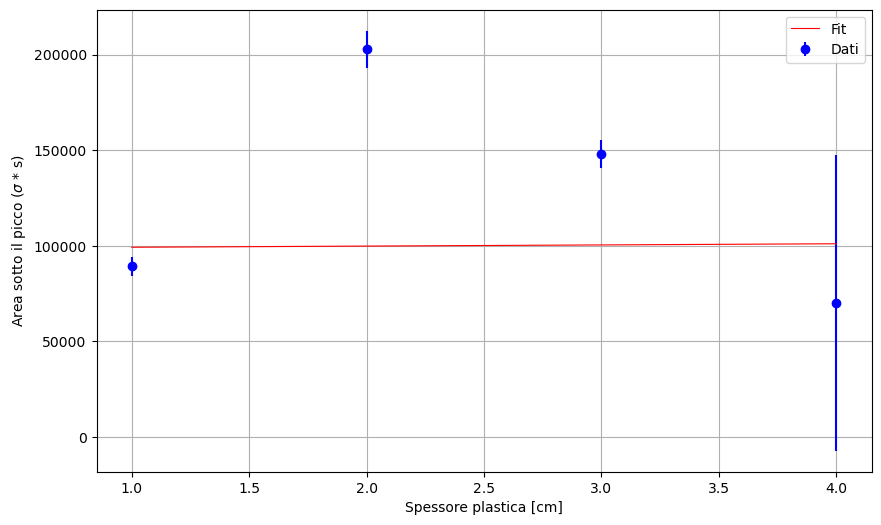

In [155]:
x = np.linspace(1, 4, 10000)
y = exp(x, vals[0], vals[1])
plt.figure(figsize = (10, 6))
plt.errorbar([1, 2, 3, 4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
             yerr = [prop_err_mol(s1, sig1, err_s1, err_sig1),
                     prop_err_mol(s2, sig2, err_s2, err_sig2),
                     prop_err_mol(s3, sig3, err_s3, err_sig3),
                     prop_err_mol(s4, sig4, err_s4, err_sig4) ],
             fmt = 'o', label = 'Dati', color = 'blue',)
plt.plot(x, y, label = 'Fit', color = 'red', linewidth = 0.8)
plt.grid()
plt.xlabel('Spessore plastica [cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.legend()

### Confronto

In [156]:
print(att_B_p, '+-', err_att_B_p, att_B_al, '+-', err_att_B_al)
print(att_C_p, '+-', err_att_C_p, att_C_al, '+-', err_att_C_al)
print(TestCompatibilita(att_B_p, att_C_p, err_att_B_p, err_att_C_p))



0.09661763436653723 +- 0.024440699860775125 -0.006085550033009457 +- 0.01652011621116073
0.02804662846057771 +- 0.022662109045898913 0.08532593641630734 +- 0.031115932985405055
2.001685907102872


# Aria

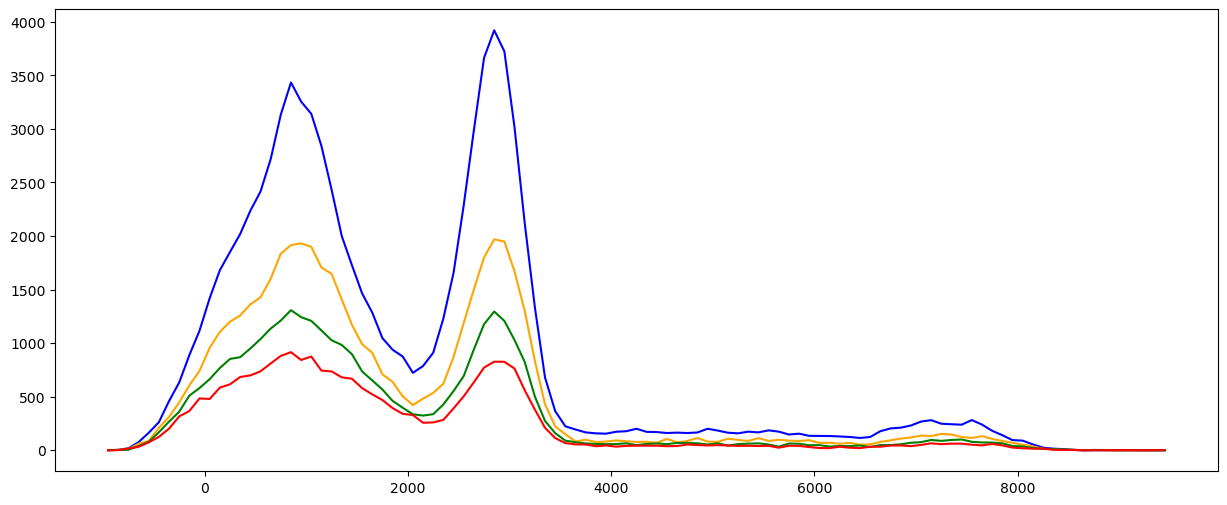

In [157]:
Na_B_1_ar = read_corretto (path = 'Dati/Parte 2/Aria/Na_bgo_1.txt', titles = ['ADC', 'Counts'])
Na_B_2_ar = read_corretto (path = 'Dati/Parte 2/Aria/Na_bgo_2.txt', titles = ['ADC', 'Counts'])
Na_B_3_ar = read_corretto (path = 'Dati/Parte 2/Aria/Na_bgo_3.txt', titles = ['ADC', 'Counts'])
Na_B_4_ar = read_corretto (path = 'Dati/Parte 2/Aria/Na_bgo_4.txt', titles = ['ADC', 'Counts'])
fig, axes = plt.subplots(1, 1, figsize = (15, 6))
start_index_ar = 0
end_index_ar = 170 - 65
plt.plot(Na_B_1_ar['ADC'][start_index_ar:end_index_ar], Na_B_1_ar['Counts'][start_index_ar:end_index_ar], label = '1 cm', color = 'blue')
plt.plot(Na_B_2_ar['ADC'][start_index_ar:end_index_ar], Na_B_2_ar['Counts'][start_index_ar:end_index_ar], label = '2 cm', color = 'orange')
plt.plot(Na_B_3_ar['ADC'][start_index_ar:end_index_ar], Na_B_3_ar['Counts'][start_index_ar:end_index_ar], label = '3 cm', color = 'green')
plt.plot(Na_B_4_ar['ADC'][start_index_ar:end_index_ar], Na_B_4_ar['Counts'][start_index_ar:end_index_ar], label = '4 cm', color = 'red')

In [158]:
# 1cm
start_index_ar = 94 - 65
end_index_ar = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_1_ar['ADC'][start_index_ar : end_index_ar], Na_B_1_ar['Counts'][start_index_ar : end_index_ar],
                                   np.array(np.sqrt(Na_B_1_ar['Counts'][start_index_ar:end_index_ar])),
                                   gauss_pol2, mu = 3000, sigma = 300, S = 3000, a = 0, b = 0, c = 0)

s1 = vals[2]
sig1 = vals[1]
err_s1 = errs[2]
err_sig1 = errs[1]

# 2cm
start_index_ar = 95 - 65
end_index_ar = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_2_ar['ADC'][start_index_ar : end_index_ar], Na_B_2_ar['Counts'][start_index_ar : end_index_ar],
                                   np.array(np.sqrt(Na_B_2_ar['Counts'][start_index_ar:end_index_ar])),
                                   gauss_pol2, mu = 3000, sigma = 300, S = 3000, a = 3000, b = 0, c = 0)

s2 = vals[2]
sig2 = vals[1]
err_s2 = errs[2]
err_sig2 = errs[1]
# 3cm
start_index_ar = 94 - 65
end_index_ar = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_3_ar['ADC'][start_index_ar : end_index_ar], Na_B_3_ar['Counts'][start_index_ar : end_index_ar],
                                   np.array(np.sqrt(Na_B_3_ar['Counts'][start_index_ar:end_index_ar])),
                                   gauss_pol2, mu = 3000, sigma = 300, S = 3000, a = 0, b = 0, c = 0)

s3 = vals[2]
sig3 = vals[1]
err_s3 = errs[2]
err_sig3 = errs[1]

# 4cm
start_index_ar = 94 - 65
end_index_ar = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_4_ar['ADC'][start_index_ar : end_index_ar], Na_B_4_ar['Counts'][start_index_ar : end_index_ar],
                                   np.array(np.sqrt(Na_B_4_ar['Counts'][start_index_ar:end_index_ar])),
                                   gauss_pol2, mu = 3000, sigma = 300, S = 3000, a = 0, b = 0, c = 0)

s4 = vals[2]
sig4 = vals[1]
err_s4 = errs[2]
err_sig4 = errs[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 46.66 (χ²/ndof = 2.6)      │              Nfcn = 328              │
│ EDM = 6.06e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 2.8493e3  │ 0.0023e3  │            │            │         │         │       │
│ 1 │ sigma │   259.2   │    2.3    │            │            │         │         │       │
│ 2 │ S     │  3.636e3  │  0.033e3  │            │            │         │         │       │
│ 3 │ a     │  3.23e3   │  0.12e3   │            │            │         │         │       │
│ 4 │ b     │   -1.66   │   0.08    │            │            │         │         │       │
│ 5 │ c     │ 0.223e-3  │ 0.013e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────┐
│       │            mu         sigma             S             a             b             c │
├───────┼─────────────────────────────────────────────────────────────────────────────────────┤
│    mu │          5.21            -1             6            89        -0.051    7.21704e-6 │
│ sigma │            -1           5.5           -22            62        -0.063   11.87129e-6 │
│     S │             6           -22      1.07e+03         0.6e3        -0.467   80.87177e-6 │
│     a │            89            62         0.6e3      1.47e+04        -9.891 1.55588254e-3 │
│     b │        -0.051        -0.063        -0.467        -9.891       0.00688   -1.10320e-6 │
│     c │    7.21704e-6   11.87129e-6   80.87177e-6 1.55588254e-3   -1.10320e-6      1.79e-10 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 56.38 (χ²/ndof = 3.3)      │              Nfcn = 384              │
│ EDM = 2.39e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 2.8718e3  │ 0.0035e3  │            │            │         │         │       │
│ 1 │ sigma │   267.3   │    3.5    │            │            │         │         │       │
│ 2 │ S     │  1.848e3  │  0.023e3  │            │            │         │         │       │
│ 3 │ a     │  1.86e3   │  0.10e3   │            │            │         │         │       │
│ 4 │ b     │   -0.94   │   0.06    │            │            │         │         │       │
│ 5 │ c     │ 0.123e-3  │ 0.010e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         12.3           -4            5          142       -0.077  10.43405e-6 │
│ sigma │           -4         12.2          -19           26       -0.047  10.00770e-6 │
│     S │            5          -19          536        0.3e3       -0.242  43.29407e-6 │
│     a │          142           26        0.3e3     9.85e+03       -6.282 953.80764e-6 │
│     b │       -0.077       -0.047       -0.242       -6.282      0.00417   -648.98e-9 │
│     c │  10.43405e-6  10.00770e-6  43.29407e-6 953.80764e-6   -648.98e-9     1.03e-10 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 22.91 (χ²/ndof = 1.3)      │              Nfcn = 352              │
│ EDM = 0.000103 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.878e3  │  0.004e3  │            │            │         │         │       │
│ 1 │ sigma │    256    │     4     │            │            │         │         │       │
│ 2 │ S     │  1.144e3  │  0.019e3  │            │            │         │         │       │
│ 3 │ a     │  1.30e3   │  0.07e3   │            │            │         │         │       │
│ 4 │ b     │   -0.63   │   0.05    │            │            │         │         │       │
│ 5 │ c     │   79e-6   │   8e-6    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         17.7           -4            5           98      -0.0565   7.88710e-6 │
│ sigma │           -4         18.4          -23           68      -0.0684  12.66392e-6 │
│     S │            5          -23          360        0.2e3      -0.1658  28.86067e-6 │
│     a │           98           68        0.2e3     5.52e+03      -3.6539 567.60544e-6 │
│     b │      -0.0565      -0.0684      -0.1658      -3.6539       0.0025   -395.92e-9 │
│     c │   7.88710e-6  12.66392e-6  28.86067e-6 567.60544e-6   -395.92e-9     6.35e-11 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 23.62 (χ²/ndof = 1.3)      │              Nfcn = 385              │
│ EDM = 1.63e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.896e3  │  0.005e3  │            │            │         │         │       │
│ 1 │ sigma │    256    │     5     │            │            │         │         │       │
│ 2 │ S     │    756    │    16     │            │            │         │         │       │
│ 3 │ a     │  1.18e3   │  0.07e3   │            │            │         │         │       │
│ 4 │ b     │   -0.58   │   0.05    │            │            │         │         │       │
│ 5 │ c     │   74e-6   │   7e-6    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         28.7           -6            4          117      -0.0671   9.39525e-6 │
│ sigma │           -6         28.9          -19           85      -0.0823  15.04886e-6 │
│     S │            4          -19          246       0.17e3      -0.1431  24.99547e-6 │
│     a │          117           85       0.17e3     4.59e+03      -3.0316 470.51528e-6 │
│     b │      -0.0671      -0.0823      -0.1431      -3.0316      0.00207   -326.89e-9 │
│     c │   9.39525e-6  15.04886e-6  24.99547e-6 470.51528e-6   -326.89e-9     5.23e-11 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

## Confronto

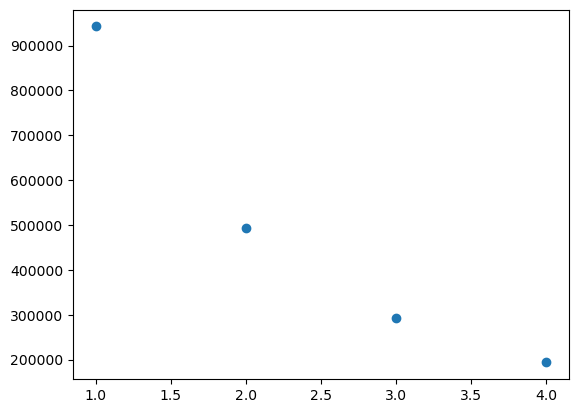

In [159]:
plt.plot (np.linspace(1, 4, 4), (abs(s1*sig1), abs(s2*sig2), abs(s3*sig3), abs(s4*sig4)), 'o')

In [160]:
pars, vals, errs, *others = LS_fit(np.linspace(1, 4, 4), (abs(s1*sig1), abs(s2*sig2), abs(s3*sig3), abs(s4*sig4)),
                                   (prop_err_mol(s1, sig1, err_s1, err_sig1),
                                    prop_err_mol(s2, sig2, err_s2, err_sig2),
                                    prop_err_mol(s3, sig3, err_s3, err_sig3),
                                    prop_err_mol(s4, sig4, err_s4, err_sig4)),
                                    ang_sol_exp, a = 10000, b = 0, c = 0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.1979 (χ²/ndof = 0.2)     │              Nfcn = 566              │
│ EDM = 3.12e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   8.2e6   │   2.3e6   │            │            │         │         │       │
│ 1 │ b    │   1.87    │   0.35    │            │            │         │         │       │
│ 2 │ c    │   0.05    │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────────────┐
│   │             a             b             c │
├───┼───────────────────────────────────────────┤
│ a │      5.47e+12   816.75127e3 107.3009068e3 │
│ b │   816.75127e3         0.123        0.0159 │
│ c │ 107.3009068e3        0.0159       0.00215 │
└───┴───────────────────────────────────────────┘